# Experimental Data (Testing)

In [5]:
1120/40

28.0

In [1]:
from torch import nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'

In [2]:
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector

In [3]:
filenames

NameError: name 'filenames' is not defined

In [ ]:
import os
#directory='test_traj_files_homo'
directory='../tmate_trajectories/'
filenames = os.listdir(directory)

f_idx = 20
filenames[f_idx]


In [2]:
#base='test_sims_het/1000part_32xspeed_heterogeneous/'
base = '../experimental_trajectories/'
#base='shew_noflow/8040_20x_002_frames/'
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
files=os.listdir(base)

#5 for noflow
#3 ofr flow
full_files=[]
sorted_frames = np.sort(files)#sorted(files, key=lambda x: int(x[4:-4]))

#sorted_frames = sorted(files, key=lambda x: int(x[5:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)

In [3]:
full_files

['../experimental_trajectories/acid_401020_1ulh_001.csv',
 '../experimental_trajectories/acid_401020_5ulh_001.csv',
 '../experimental_trajectories/acid_402020_1ulh_001.csv',
 '../experimental_trajectories/acid_402020_5ulh_002.csv',
 '../experimental_trajectories/acid_8020_1ulh_001.csv',
 '../experimental_trajectories/acid_open_20x_20fps_001.csv',
 '../experimental_trajectories/geo_802020_5ulh_003.csv',
 '../experimental_trajectories/geo_8020_1ulh_001.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_001.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_002.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_003.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_004.csv',
 '../experimental_trajectories/noflow_geo4020_20x_1min_001.csv',
 '../experimental_trajectories/noflow_geo4020_20x_1min_002.csv',
 '../experimental_trajectories/noflow_geo4020_20x_1min_003.csv',
 '../experimental_trajectories/noflow_paen4020_20x_5min_001.csv',
 '../experimen

In [4]:
#torch.cuda.empty_cache()
import gc
gc.collect()

0

# Load Test Images

In [5]:
full_files[0]

'../experimental_trajectories/acid_401020_1ulh_001.csv'

In [6]:
import cv2
import numpy as np
import cv2
from joblib import Parallel, delayed
l1=448
l2 = 384
l3 = 224
from PIL import Image

def process_file(file_path, l):
    image = np.array(Image.open(file_path))
    resized_image = cv2.resize(image, [l, l])
    resized_image = (resized_image - np.min(resized_image)) / (np.max(resized_image) - np.min(resized_image))
    return resized_image

def parallel_image_processing(full_files, l):
    num_files = len(full_files)
    images = np.zeros([num_files, l, l])
    results = Parallel(n_jobs=16)(delayed(process_file)(file_path, l) for file_path in full_files)
    for i, resized_image in enumerate(results):
        images[i] = resized_image
    return images

images = parallel_image_processing(full_files,l1)
images2 = parallel_image_processing(full_files,l1)
#images3 = parallel_image_processing(full_files,l2)

UnidentifiedImageError: cannot identify image file '../experimental_trajectories/acid_402020_1ulh_001.csv'

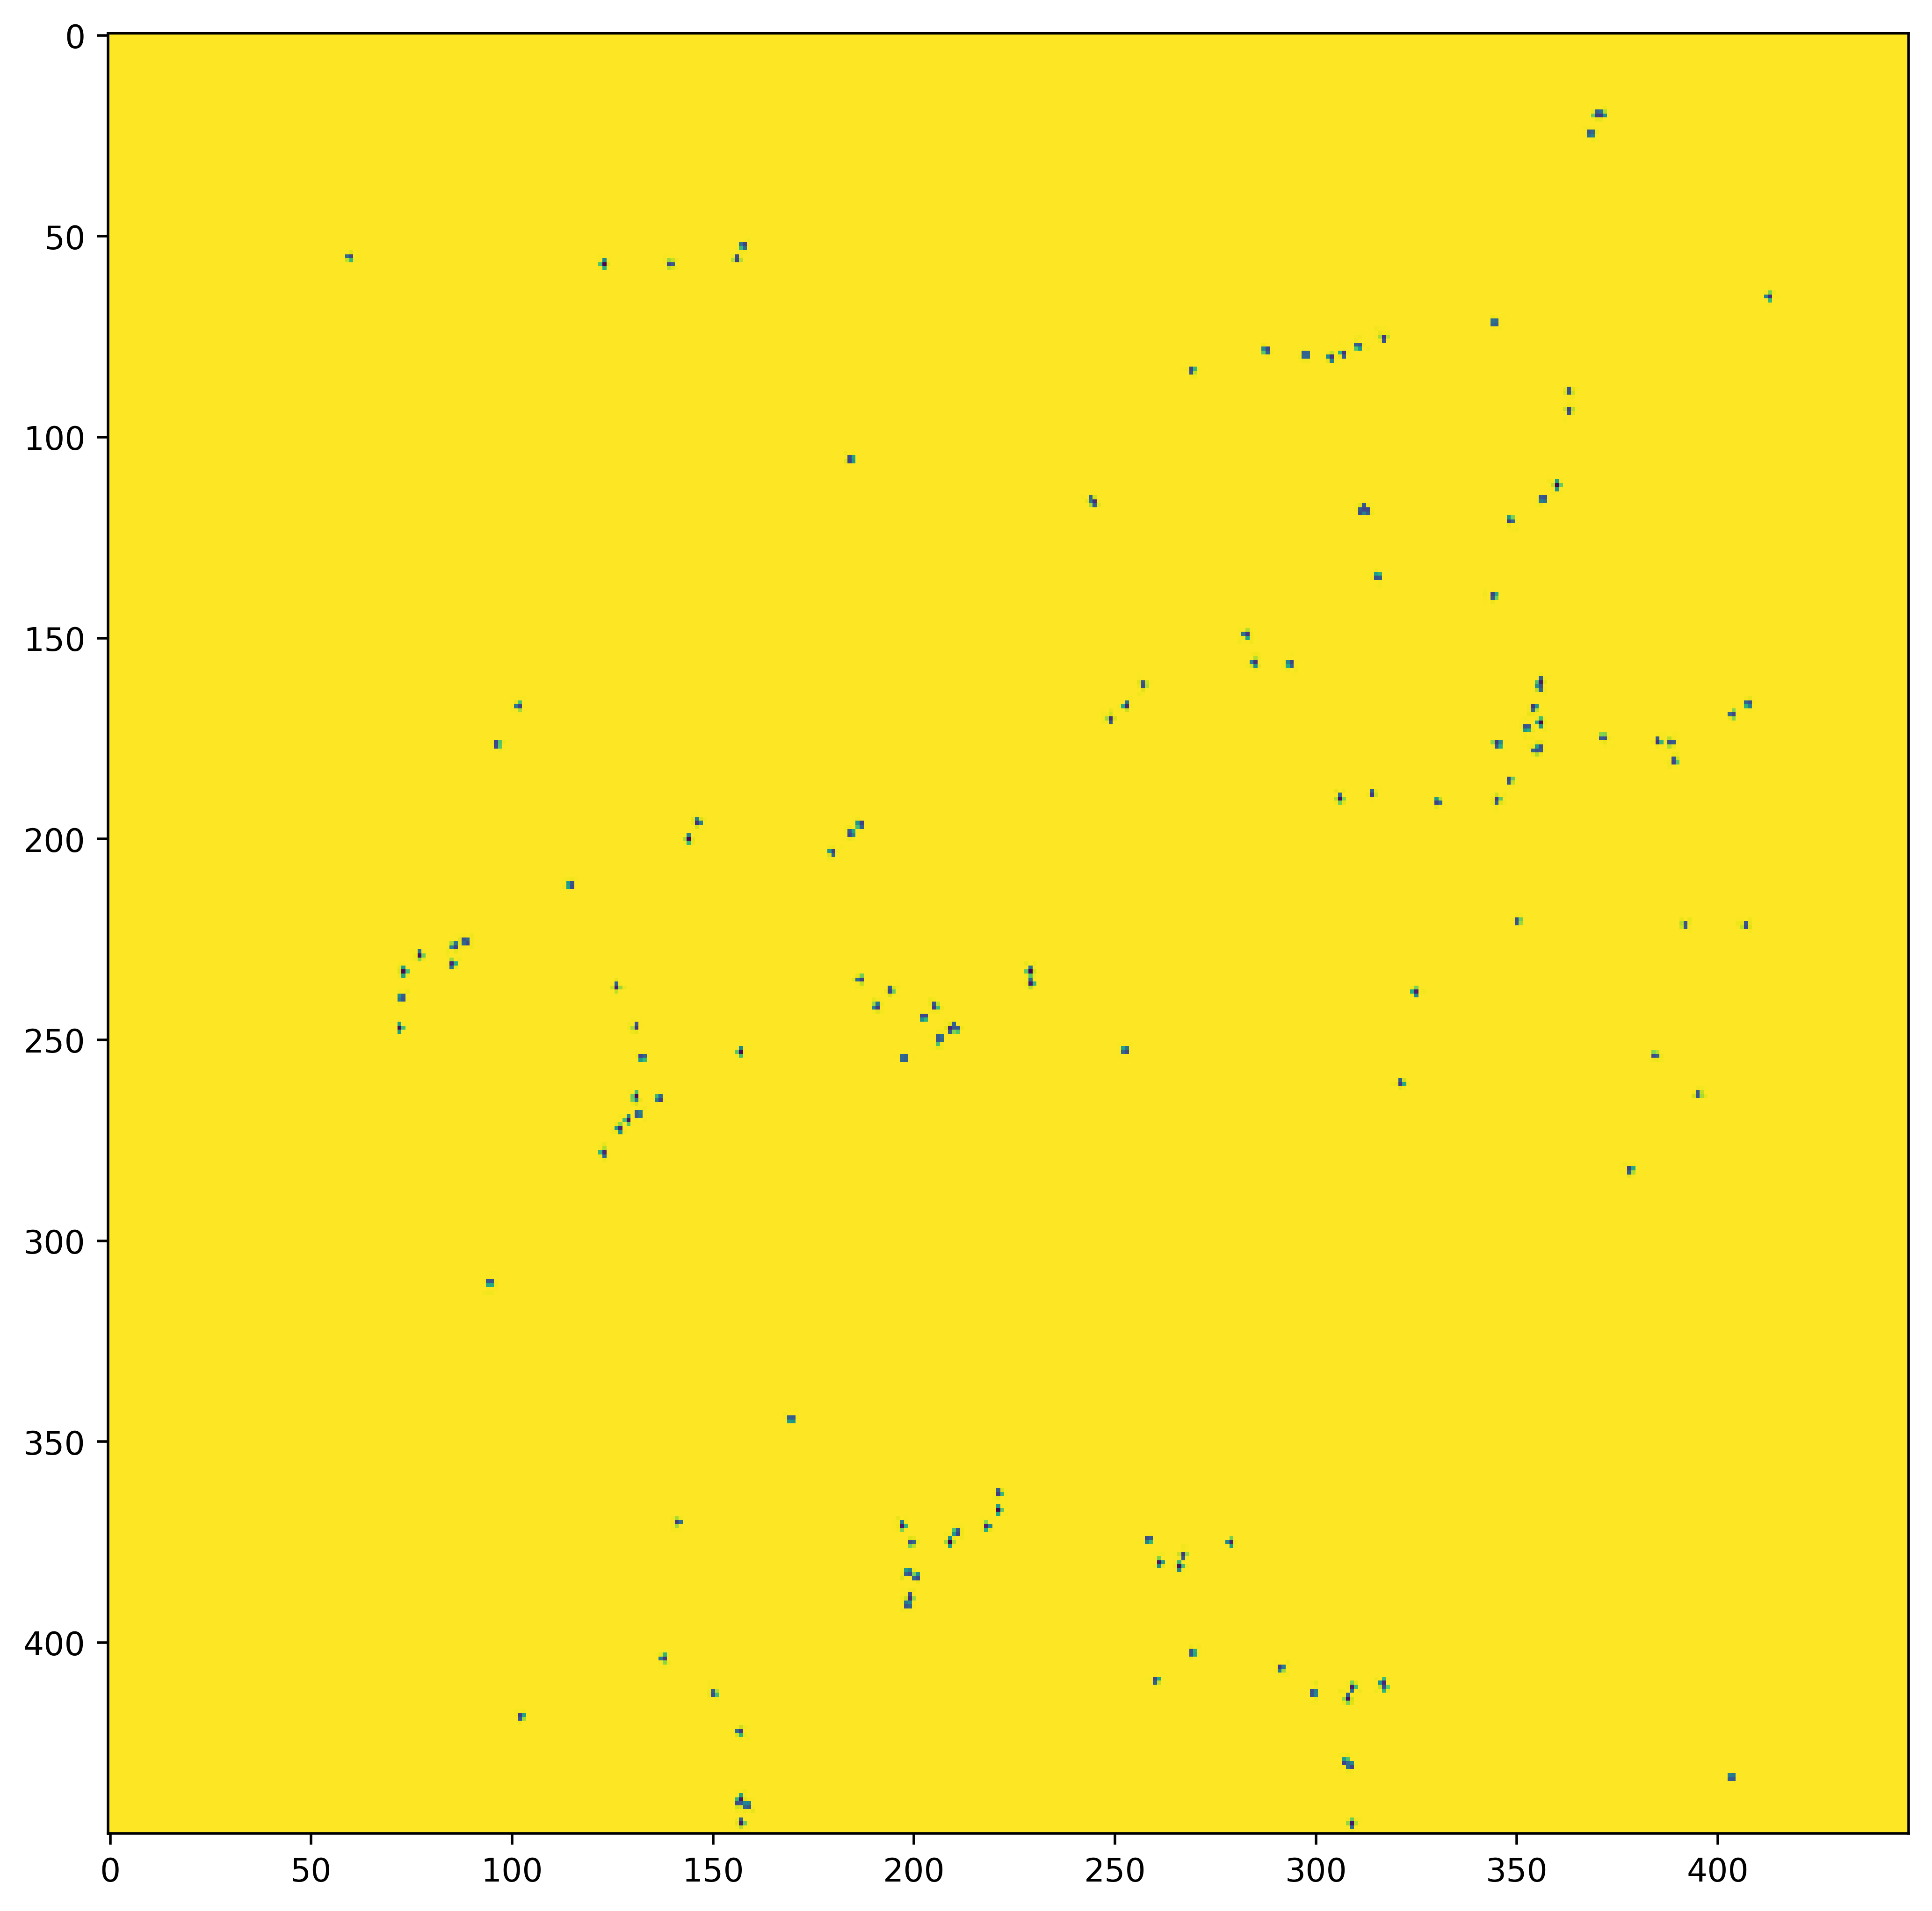

In [8]:
plt.figure(figsize=(10,10),dpi=500)
plt.imshow(images[-1])


In [9]:
# for i in range(len(images)):
#     images[i] = 1-images[i]
np.mean(images[0])

0.9889182235394156

In [10]:

class TestDataset2(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        image = torch.transpose(image,1,2)
        return image.float()

if (images.shape[0]-30)%40==0:
    images = images[30:,:,:].reshape([(images.shape[0]-30)//40,40,448,448])
elif (images.shape[0]-20)%40==0:
    images = images[20:,:,:].reshape([(images.shape[0]-20)//40,40,448,448])
elif (images.shape[0]-10)%40==0:
    images = images[10:,:,:].reshape([(images.shape[0]-10)//40,40,448,448])
else:
    images = images.reshape([(images.shape[0])//40,40,448,448])
    
images = torch.tensor(images)

dataset_test = TestDataset2(images)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 2
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=0)

if (images2.shape[0]-20)%30==0:
    images2 = images2[20:,:,:].reshape([(images2.shape[0]-20)//30,30,448,448])
elif (images2.shape[0]-10)%30==0:
    images2 = images2[10:,:,:].reshape([(images2.shape[0]-10)//30,30,448,448])
else:
    images2 = images2.reshape([(images2.shape[0])//30,30,448,448])



images2 = torch.tensor(images2)

dataset_test = TestDataset2(images2)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 2
test_dataloader2 = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=0)


x = next(iter(test_dataloader2))

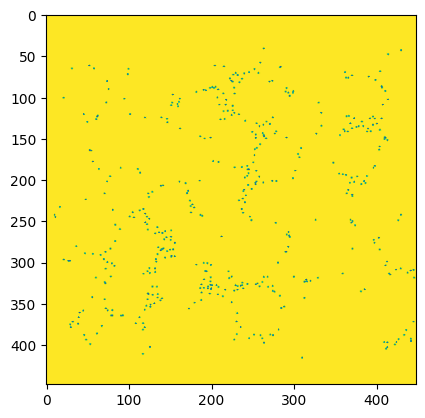

In [11]:
plt.imshow(x[0,29,:,:])

In [12]:
images2.shape

torch.Size([3, 30, 448, 448])

# Speed Models

In [13]:
images.shape

torch.Size([2, 40, 448, 448])

# Test Dataloader

In [14]:

# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=Net2()
# model.to(device)
# Define your custom dataset


In [15]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [16]:
#Paen
#images = images[22:,:,:].reshape([(images.shape[0]-22)//40,40,500,500])
#Geo
#images = images[:-39,:,:].reshape([(images.shape[0]-39)//40,40,500,500])


# Speed Classifier

In [17]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        l=200
        self.fc2=nn.Conv2d(100, l, 1, stride=2)
        #self.m1 = nn.BatchNorm1d(1000)
        self.d1 = nn.Dropout(.2)
        self.fc1=nn.Conv2d(40, 100, 1, 
                           stride=2)
        #self.m2 = nn.BatchNorm1d(l)
        self.d2 = nn.Dropout(.2)
       # self.fc2 = nn.Linear(800,l)
       # self.fc3=nn.Linear(2000,800)
       # self.fc4 = nn.Linear(800,l)
        self.fc5 = nn.Conv2d(l, 5,1, stride=1)
        #self.m3 = nn.BatchNorm1d(100)
        self.fc6 = nn.Linear(312500,1000)
        self.d3 = nn.Dropout(.2)
        self.fc7 = nn.Linear(100,4)
        self.fc8 = nn.Linear(2000,1000)

    def forward(self, x):
        b = x.shape[0]
        x = x.squeeze()
        
        l=200
        x = F.relu(self.fc1(x))
        #x = self.m1(x)
        x = self.d1(x)
        x = F.relu(self.fc2(x))
        #x = self.m2(x)
        x = self.d2(x)
        #x = x.permute(0,2,1)
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        
        #x = x.view(b,l*666)
        x = F.relu(self.fc5(x))
        #x = self.m3(x)
        x = x.reshape(b, -1)
        #x = F.relu(self.fc4(x))
        x = (self.fc6(x))
        # x = self.d3(x)
        # #x = torch.flatten(x)
        # x = (self.fc8(x))
        # x = x.reshape(2,200)
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

import torchvision

class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)


        self.fc0=nn.Linear(2000,200)
        self.fc1=nn.Linear(200,4)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        #x = F.gelu(self.m0(x))
        x1 = (self.m1(x1))
        x2 = (self.m2(x2))
        x3 = (self.m3(x3))
        x4 = (self.m4(x4))
        
        #x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
       # del x1,x2, x3, x4
        #x0 = F.gelu(self.fc0(x0))
        #x = torch.cat([x,x0],dim=1)#x*x0
        #x = F.gelu(self.fc0(x))
        x = F.gelu(self.fc0(x))

        x = F.softmax(self.fc1(x),dim=1)


        return x#,x2,x3,x4\


class Net7(nn.Module):
    def __init__(self):
        super(Net7, self).__init__()
        self.m1 = timm.create_model('regnetx_160.pycls_in1k', in_chans=40,drop_path_rate=0.6, num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x


class Net6(nn.Module):
    def __init__(self):
        super(Net6, self).__init__()
        self.m1 = timm.create_model('regnetx_064', in_chans=40,drop_path_rate=0.4, num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
    
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.m1 = timm.create_model('densenet169', in_chans=40, num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x

class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.9,num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
        
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.6,num_classes=3,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
    
class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.8,num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.6,num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        l=80

        self.fc1=nn.Linear(1000,l)
        self.d1 = nn.Dropout(.1)
        self.fc2=nn.Linear(1000,l)
        self.d2 = nn.Dropout(.1)
        self.fc3 = nn.Linear(40*l*l,1000)
        self.d3 = nn.Dropout(.1)
        self.fc4 = nn.Linear(1000,250)
        self.fc4_2 = nn.Linear(250,1000)
#         self.fc4_3 = nn.Linear(800,300)
#         self.fc5 = nn.Linear(300,30)
# #         self.fc5_2 = nn.Linear(200,100)
# #         self.fc5_3 = nn.Linear(100,30)
#         self.fc6 = nn.Linear(30,3)

    def forward(self, x):
        b = x.shape[0]
        x = F.relu(self.fc1(x))
        x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.relu(self.fc2(x))
        x = self.d2(x)
        x = torch.reshape(x, [b,-1])
        x = F.relu(self.fc3(x))
        x = self.d3(x)
        x = F.relu(self.fc4(x))
        #x = torch.reshape(x, [b,10000])
        x = (self.fc4_2(x))
#         x = F.rrelu(self.fc4_3(x))
#         x = F.rrelu(self.fc5(x))
# #         x = F.rrelu(self.fc5_2(x))
# #         x = F.rrelu(self.fc5_3(x))
#         x = self.fc6(x)
        #x = torch.reshape(x, [b,2,100])
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

In [18]:
#model9 = Net0()
#model9.load_state_dict(torch.load('models/speed_classifier_volod3_448px_disp200'))
#model9.to(device).eval()

#model15 = Net7()
#model15.load_state_dict(torch.load('models/speed_classifier_regnetx120_500px_disp_all'))
#model15.to(device).eval()
    
#model21 = Net4()
#model21.load_state_dict(torch.load('models/speed_classifier_volod1_224px_disp_all'))
#model21.to(device).eval()

model3 = timm.create_model('volo_d3_448', in_chans=30,drop_path_rate=.0, num_classes=4,pretrained=False)
model3.load_state_dict(torch.load('models/speed_classifier_volod1_448px_disp_all_5_04'))
model3.to(device).eval()

model0 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=4,pretrained=False)
model0.load_state_dict(torch.load('models/speed_classifier_volod1_384px_disp_all_5_04_v3'))
model0.to(device).eval()

model1 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=4,pretrained=False)
model1.load_state_dict(torch.load('models/speed_classifier_volod1_384px_disp_all_5_04_v2'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=4,pretrained=False)
model2.load_state_dict(torch.load('models/speed_classifier_volod1_384px_disp_all_5_04_v1'))
model2.to(device).eval()



VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(30, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [19]:
model4 = timm.create_model('volo_d4_448', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model4.load_state_dict(torch.load('models/speed_classifier_5class_volod4_448px_disp_all_5_04'))
model4.to(device).eval()

model5 = timm.create_model('volo_d3_448', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model5.load_state_dict(torch.load('models/speed_classifier_5class_volod3_448px_disp_all_5_05'))
model5.to(device).eval()

model6 = timm.create_model('volo_d3_448', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model6.load_state_dict(torch.load('models/speed_classifier_5class_volod3_448px_disp_lbm_5_07'))
model6.to(device).eval()

model7 = timm.create_model('volo_d3_448', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model7.load_state_dict(torch.load('models/speed_classifier_5class_volod3_448px_disp_homo_5_07'))
model7.to(device).eval()

model8 = timm.create_model('volo_d3_448', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model8.load_state_dict(torch.load('models/speed_classifier_5class_volod3_448px_disp_lbm_5_07_v2'))
model8.to(device).eval()

model9 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model9.load_state_dict(torch.load('models/speed_classifier_5class_volod1_384px_disp_all_5_06'))
model9.to(device).eval()

model10 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model10.load_state_dict(torch.load('models/speed_classifier_5class_volod1_384px_disp_all_5_06_v2'))
model10.to(device).eval()

model11 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model11.load_state_dict(torch.load('models/speed_classifier_5class_volod1_384px_disp_all_5_06_v3'))
model11.to(device).eval()

model12 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model12.load_state_dict(torch.load('models/speed_classifier_5class_volod1_384px_disp_all_5_06_v4'))
model12.to(device).eval()

model13 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model13.load_state_dict(torch.load('models/speed_classifier_5class_volod1_384px_disp_all_5_06_v5'))
model13.to(device).eval()

model14 = timm.create_model('volo_d1_384', in_chans=30,drop_path_rate=.0, num_classes=5,pretrained=False)
model14.load_state_dict(torch.load('models/speed_classifier_5class_volod1_384px_disp_all_5_06_v6'))
model14.to(device).eval()



VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(30, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [20]:
a=next(iter(test_dataloader2))
a.shape

torch.Size([2, 30, 448, 448])

In [21]:

model0.eval()
model1.eval()
model2.eval()

import torchvision
outputs1=[]

model4.eval()
model5.eval()
#outputs3=[]

with torch.no_grad():
    for x in test_dataloader2:
        x=1-x
        #x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)
        #x3 = torchvision.transforms.functional.resize(x, 224)

        out4 =F.softmax((model4((x).to(device)).detach().cpu()),1).numpy()
        out5 =F.softmax((model5((x).to(device)).detach().cpu()),1).numpy()
        out6 =F.softmax((model6((x).to(device)).detach().cpu()),1).numpy()
        out7 =F.softmax((model7((1-x).to(device)).detach().cpu()),1).numpy()
        out8 =F.softmax((model8((x).to(device)).detach().cpu()),1).numpy()
        out9 =F.softmax((model9((x2).to(device)).detach().cpu()),1).numpy()
        out10 =F.softmax((model10((x2).to(device)).detach().cpu()),1).numpy()
        out11 =F.softmax((model11((x2).to(device)).detach().cpu()),1).numpy()
        out12 =F.softmax((model12((x2).to(device)).detach().cpu()),1).numpy()
        out13 =F.softmax((model13((x2).to(device)).detach().cpu()),1).numpy()
        out14 =F.softmax((model14((x2).to(device)).detach().cpu()),1).numpy()


        #out=np.mean(np.vstack((out0+out1*3+out2+out3)/6),0)
        out = (out4*10+out6*10+out7*1+out8*3+out9*15+out10*1+out11*2+out12*1+out13*1)/44

        outputs1.append(out)



In [22]:
np.mean(np.vstack(out13),0)


array([0.00990336, 0.13044012, 0.30884558, 0.5480574 , 0.00275353],
      dtype=float32)

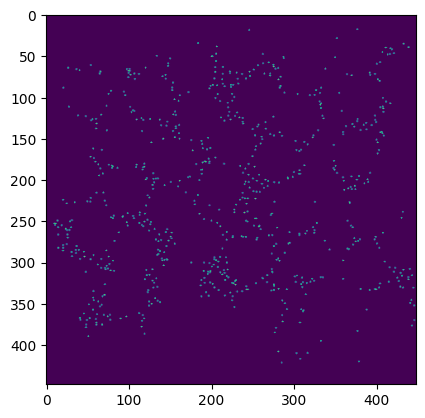

In [23]:
plt.imshow(x[0,10,:,:])

In [24]:
np.vstack(out14)

array([[1.9305136e-02, 2.9686204e-01, 2.1308701e-01, 4.6954340e-01,
        1.2024271e-03],
       [1.4767455e-04, 1.9550404e-04, 2.6509815e-03, 9.9480247e-01,
        2.2033819e-03]], dtype=float32)

In [25]:
mean_out = np.mean(np.vstack(outputs1),0)
class_num = np.argmax(mean_out)
print(class_num)
mean_out


3


array([0.0054523 , 0.34623724, 0.14348969, 0.3985106 , 0.10631017],
      dtype=float32)

In [26]:
from torch import nn
import torch.nn.functional as F

class Patch_model2(nn.Module):
    def __init__(self):
        super(Patch_model2, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model3(nn.Module):
    def __init__(self):
        super(Patch_model3, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model4(nn.Module):
    def __init__(self):
        super(Patch_model4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc0=nn.Linear(2000, 500)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        #x = F.gelu(self.fc1(x))
        x = self.fc0(x)
        return x#,x2,x3,x4


class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(4000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = torch.cat([x,x0],dim=1)#x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=1000,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'

model6 = Patch_model3()
model6.load_state_dict(torch.load('models/speed_model_volod1_patch_4x224px_dispBrown_4_21'))
model6.to(device).eval()

model7 = Patch_model()
model7.load_state_dict(torch.load('models/speed_model_Volo224-448_dispBrown_patch_v3'))
model7.to(device).eval()

model8 =Patch_model2()
model8.load_state_dict(torch.load('models/speed_model_Volo224-448_dispBrown_patch_v1'))
model8.to(device).eval()

model17 =Patch_model4()
model17.load_state_dict(torch.load('models/speed_model_patch448px_disp300_4_23_v2'))
model17.to(device).eval()

model5 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=1000,pretrained=False)
model5.load_state_dict(torch.load('models/speed_model_volod3_448px_dispBrown_4_22_v2'))
model5.to(device).eval()

model1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=1000,pretrained=False)
model1.load_state_dict(torch.load('models/speed_model_volod3_448px_dispBrown_4_22'))
model1.to(device).eval()

model2 = timm.create_model('twins_svt_small', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/speed_model_TwinsSvtSmall_500px_opposite_dispBrown_4_21'))
model2.to(device).eval()

model3 = timm.create_model('volo_d2_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/speed_model_volod1_224px_disp_4_21'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/speed_model_volod1_224px_dispBrown_4_21'))
model4.to(device).eval()

model18 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model18.load_state_dict(torch.load('models/speed_model_384px_disp300_4_23'))
model18.to(device).eval()

model19 = timm.create_model('volo_d2_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model19.load_state_dict(torch.load('models/speed_model_384px_disp300_4_23_v2'))
model19.to(device).eval()

model20 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model20.load_state_dict(torch.load('models/speed_model_volod3_448px_disp300_4_25'))
model20.to(device).eval()

model9 = Net0()
model9.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_full'))
model9.to(device).eval()

model10 = Net0()
model10.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_fullv2'))
model10.to(device).eval()

model11 = Net0()
model11.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_fullv3'))
model11.to(device).eval()

model12 = Net0()
model12.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_full_new_v1'))
model12.to(device).eval()

model13 = Net2()
model13.load_state_dict(torch.load('models/speed_model_Volo448_dispBrown'))
model13.to(device).eval()

model14 = Net3()
model14.load_state_dict(torch.load('models/speed_model_Volo448_dispBrown_full'))
model14.to(device).eval()

model15 = timm.create_model('swinv2_small_window16_256', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model15.load_state_dict(torch.load('models/speed_model_patch_swin_256px_dispBrown_4_23'))
model15.to(device).eval()

model16 = timm.create_model('botnet26t_256', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model16.load_state_dict(torch.load('models/speed_model_ByobNet26_256px_dispBrown_4_23'))
model16.to(device).eval()

ByobNet(
  (stem): Stem(
    (conv1): ConvNormAct(
      (conv): Conv2d(40, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (conv2): ConvNormAct(
      (conv): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (conv3): ConvNormAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)


In [27]:
model21 = timm.create_model('volo_d1_384', in_chans=35, drop_path_rate=.0,num_classes=500,pretrained=False)
model21.load_state_dict(torch.load('models/speed_model_volod1_384px_disp_lbm_5_04_max216_7189'))
model21.to(device).eval()

model22 = timm.create_model('volo_d1_384', in_chans=30, drop_path_rate=.0,num_classes=500,pretrained=False)
model22.load_state_dict(torch.load('models/speed_model_volod1_384px_disp_lbm_5_04_v3'))
model22.to(device).eval()

model23 = timm.create_model('volo_d1_224', in_chans=30, drop_path_rate=.0,num_classes=500,pretrained=False)
model23.load_state_dict(torch.load('models/speed_model_volod1_384px_disp_all_5_04_v4'))
model23.to(device).eval()

model24 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model24.load_state_dict(torch.load('models/speed_model_volod2_384px_disp_lbm_5_04_max122_8786_v2'))
model24.to(device).eval()

VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [28]:
model25 = timm.create_model('volo_d3_448', in_chans=30, drop_path_rate=.0,num_classes=500,pretrained=False)
model25.load_state_dict(torch.load('models/speed_model_volod3_448px_disp_lbm_5_07'))
model25.to(device).eval()

model26 = timm.create_model('volo_d3_448', in_chans=30, drop_path_rate=.0,num_classes=500,pretrained=False)
model26.load_state_dict(torch.load('models/speed_model_volod3_448px_disp_lbm_5_07_v2'))
model26.to(device).eval()

VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(30, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [106]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    
#model.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model7.eval()
model8.eval()
model9.eval()
model10.eval()
model11.eval()
model12.eval()
model13.eval()
model14.eval()
model15.eval()
model16.eval()
model17.eval()
model18.eval()
model19.eval()
model20.eval()
model21.eval()
model22.eval()
model23.eval()
model24.eval()

max24 = 122.8786
max21 = 216.7189

with torch.no_grad():
    for x in test_dataloader:
        #x=1-x
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 224)
        x3 = torchvision.transforms.functional.resize(x, 384)
        x4 = torchvision.transforms.functional.resize(x, 256)
        #out1_1000 = (model1((1-x1).to(device)).detach().cpu().numpy())
        #out1 = np.zeros([batch_size,500])
        #for i in range(len(out1)):
        #    out1[i,:] = interpolate_vectors(out1_1000[i,:],500)
        out2 = np.sort(model2((x).to(device)).detach().cpu().numpy())
        out11 = np.sort(model11((x3).to(device)).detach().cpu().numpy())
        #out10 =(model10((x3).to(device)).detach().cpu().numpy())
        out9 = np.sort(model9((x3).to(device)).detach().cpu().numpy())
        out8 = np.sort(model8((x).to(device)).detach().cpu().numpy())
        out7 =np.sort(model7((x).to(device)).detach().cpu().numpy())
        out6 = np.sort(model6((1-x).to(device)).detach().cpu().numpy())
        out3 = np.sort(model3((1-x2).to(device)).detach().cpu().numpy())
        out4 = np.sort(model4((x2).to(device)).detach().cpu().numpy())
        #out5 = np.sort(model5((x1).to(device)).detach().cpu().numpy())
        out12 = np.sort(model12((x3).to(device)).detach().cpu().numpy())
        #out0 = (model((1-x1).to(device)).detach().cpu().numpy())
        out13_1000 = np.sort(model13((x1).to(device)).detach().cpu().numpy())
        out13 = np.zeros([batch_size,500])
        for i in range(len(out13)-1):
             out13[i,:] = interpolate_vectors(out13_1000[i,:],500)
        out14 = np.sort(model14((x).to(device)).detach().cpu().numpy())
        out15 = np.sort(model15((1-x4).to(device)).detach().cpu().numpy())
        #out16 = (model16((1-x4).to(device)).detach().cpu().numpy())
        out17 = np.sort(model17((1-x).to(device)).detach().cpu().numpy())
        out18 = np.sort(model18((x3).to(device)).detach().cpu().numpy())
        out19 = np.sort(model19((1-x3).to(device)).detach().cpu().numpy())
        out20 = np.sort(model20((1-x).to(device)).detach().cpu().numpy())
        out21 = np.sort(model21((1-x3[:,5:,:,:]).to(device)).detach().cpu().numpy())*max21
        out22 = np.sort(model22((1-x3[:,5:35,:,:]).to(device)).detach().cpu().numpy())
        out23 = np.sort(model23((1-x2[:,5:35,:,:]).to(device)).detach().cpu().numpy())
        out25 = np.sort(model25((1-x[:,5:35,:,:]).to(device)).detach().cpu().numpy())
        out26 = np.sort(model26((x[:,5:35,:,:]).to(device)).detach().cpu().numpy())

        out24 = np.sort(model24((1-x3).to(device)).detach().cpu().numpy())*max24
        

        out14_2 = np.sort(model14((1-x1).to(device)).detach().cpu().numpy())
        out15_2 = np.sort(model15((x4).to(device)).detach().cpu().numpy())
        #out16 = (model16((1-x4).to(device)).detach().cpu().numpy())
        out17_2 = np.sort(model17((x1).to(device)).detach().cpu().numpy())
        out18_2 = np.sort(model18((1-x3).to(device)).detach().cpu().numpy())
        out19_2 = np.sort(model19((x3).to(device)).detach().cpu().numpy())
        out20_2 = np.sort(model20((x1).to(device)).detach().cpu().numpy())

        
        if class_num==4:
            #1ulh
            #class 3 (x<3)
            out=(out4*6+(out14)*15+out17*50+out18*15+(out17_2)*20+(out19_2)*25+(out20)*10+(out8)*2.5+(out9)*13.5+out26*2)/180
        elif class_num==3:
            #class 2 (3<x<6)
            out=(out2*10+out6*4+out11*5+out14*4+out15*2+out17*10+out18*8+out19*26+out20*2+out9*3+out22*1+out23*1+out24*1+out25*1+out26*60)/110
        elif class_num==2:
            #5ulh
            #class 1 (6<x<10)
            out=(out3*8+out4*32+out8*15+out11*33+out13*50+out14*5+out18*17+out19*17+out6*5+out2*5)/166
            
        else:
            #class 0 (x>10)
            out=(out3*8+out4*64+out8*15+out11*33+out13*50+out14*5+out18*17+out19*17+out6*5+out2*10)/190

        outputs.append(out)
        #outputs2.append(out2)


In [107]:
np.mean(out2)


4.1097646

In [108]:
np.mean(out)


11.533619

In [109]:
stacked_out = np.vstack(outputs)
out = np.reshape(stacked_out,[stacked_out.shape[0]*stacked_out.shape[1], ])
#out = out[out>0]
out.shape

(1000,)

In [110]:
np.mean(out)

11.533619

# Calculate Speeds from Experimental Particle Tracking Data

In [7]:
full_files

['../experimental_trajectories/acid_401020_1ulh_001.csv',
 '../experimental_trajectories/acid_401020_5ulh_001.csv',
 '../experimental_trajectories/acid_402020_1ulh_001.csv',
 '../experimental_trajectories/acid_402020_5ulh_002.csv',
 '../experimental_trajectories/acid_8020_1ulh_001.csv',
 '../experimental_trajectories/acid_open_20x_20fps_001.csv',
 '../experimental_trajectories/geo_802020_5ulh_003.csv',
 '../experimental_trajectories/geo_8020_1ulh_001.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_001.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_002.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_003.csv',
 '../experimental_trajectories/noflow_acid4020_20x_1min_004.csv',
 '../experimental_trajectories/noflow_geo4020_20x_1min_001.csv',
 '../experimental_trajectories/noflow_geo4020_20x_1min_002.csv',
 '../experimental_trajectories/noflow_geo4020_20x_1min_003.csv',
 '../experimental_trajectories/noflow_paen4020_20x_5min_001.csv',
 '../experimen

In [10]:
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import os

def process_file(filename):
    df = pd.read_csv(os.path.join(filename), header=0, skiprows=[1, 2, 3])
    tracks = df.TRACK_ID.unique()
    vels = []

    for track in tracks:
        posx = df[df.TRACK_ID == track].sort_values(by='FRAME').POSITION_X
        posy = df[df.TRACK_ID == track].sort_values(by='FRAME').POSITION_Y
        vel = np.sqrt((posx.diff()**2 + posy.diff()**2)).dropna()
        vels.extend(vel.values)
    
    vels = np.array(vels)
    vels = vels[(~np.isnan(vels)) & (vels < 300) & (vels > 0)]
    return vels

vel_list = Parallel(n_jobs=12)(delayed(process_file)(filename) for filename in full_files)

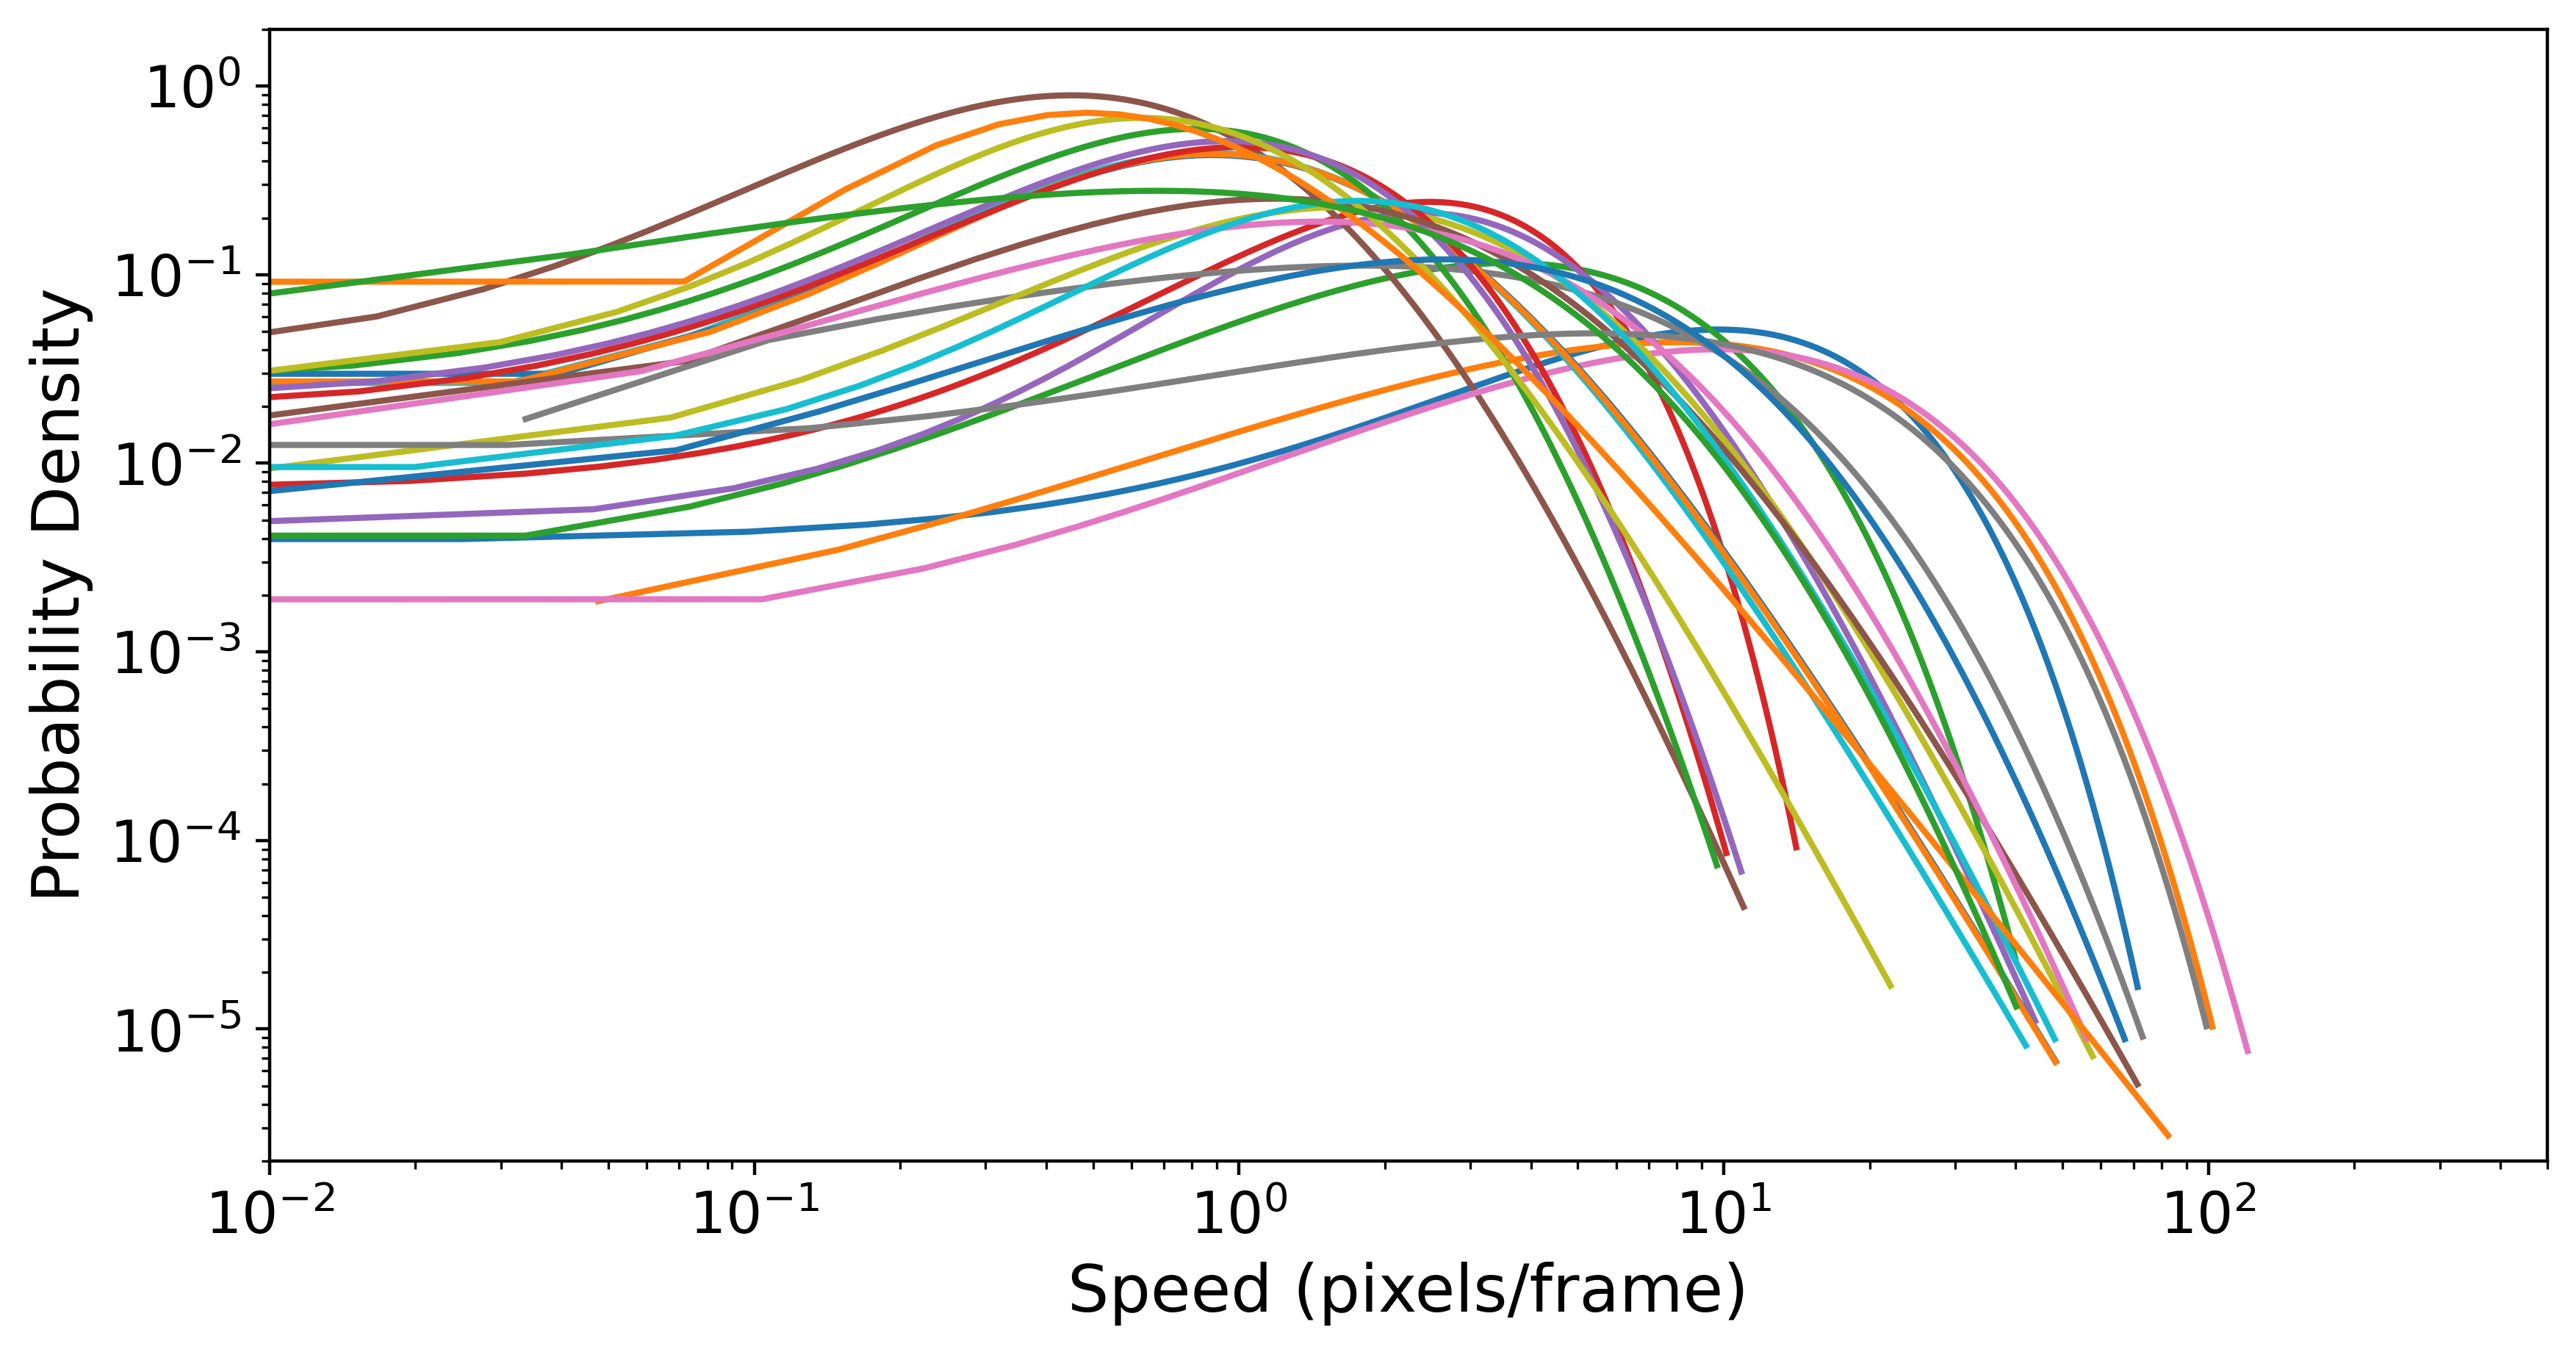

In [19]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

plt.figure(figsize=(10,5),dpi=400)
for i in range(len(vel_list)):
    w=interpolate_vectors(np.sort(vel_list[i]),1000)
    a,b,c,d = betaprime.fit(w)       
    xtorch= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                    betaprime.ppf(0.9999, a,b,c,d), 1000)
    distr_torch=betaprime.pdf(xtorch, a,b,c,d)
    plt.plot(xtorch,distr_torch)

plt.ylabel('Probability Density', fontsize=16)
plt.xlabel('Speed (pixels/frame)',fontsize=16)
plt.xlim([1e-2,500])
plt.ylim([2e-6,2])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.yscale('log')
plt.xscale('log')
#plt.title('Vx Distributions for All Test Simulations', fontsize=12)
plt.savefig('speed_experimental_test_variation.png')
#plt.xscale('log')
#plt.yscale('log')

In [9]:
vel_list=[]
for i in range(len(full_files)):
    print(i)
    filename = full_files[i]#'../tmate_trajectories/het_1000part_32xspeed_TM_kalman.csv'
    #directory='../tmate_trajectories/'
    # filename = os.listdir(directory)[f_idx]
    # print(filename)
    df = pd.read_csv(os.path.join(filename),header=0, skiprows=[1,2,3])
    #df.Positio
    tracks = df.TRACK_ID.unique()
    vels=1
    for i in range(len(tracks)):
        idx = tracks[i]
        #if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posx = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        vel = (np.sqrt((posx.diff()**2+posy.diff()**2))).dropna()
    
        vels = np.hstack([vels, vel])
            
    vels=vels[~np.isnan(vels)]
    vels = vels[vels<300]
    vels = vels[vels>0]
    vel_list.append(vels)

KeyboardInterrupt: 

In [ ]:
vel_list

In [100]:
#vels=vels/2
np.mean(vels)
##np.mean(out23*.325/.12)
#posy

15.059283033575745

In [101]:
np.mean(out)

14.07122

In [47]:
np.sort(vels)

array([5.54067994e-08, 8.67913251e-08, 1.28107096e-07, ...,
       1.82865916e+02, 1.92796564e+02, 2.40153892e+02])

In [103]:
criterion = nn.MSELoss()
criterion(torch.tensor(np.sort(interpolate_vectors(out, len(vels)))), torch.tensor(np.sort(vels)))

tensor(45.6456, dtype=torch.float64)

In [102]:
print('Absolute Error of Average Speed: ', np.abs(np.mean(vels)-np.mean(out)))


Absolute Error of Average Speed:  0.9880626356265267


(4e-05, 0.1)

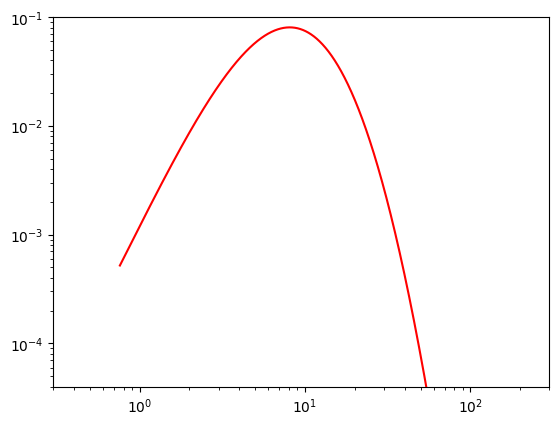

In [111]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm
#new_out=(out6*4+out2*1+out9*.5+out1*1+out10*2.5)/9
a,b,c,d= betaprime.fit(np.sort(out[out>0]))
xtorch= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 4000)
distr_torch=betaprime.pdf(xtorch, a,b,c,d)
plt.plot(xtorch,distr_torch,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,3e2])
plt.ylim([4e-5,.1])
#15, 16, 20, 9, 3, 10
#3, 4, 6, 7, 12, 13, 17, 18, 19, 20

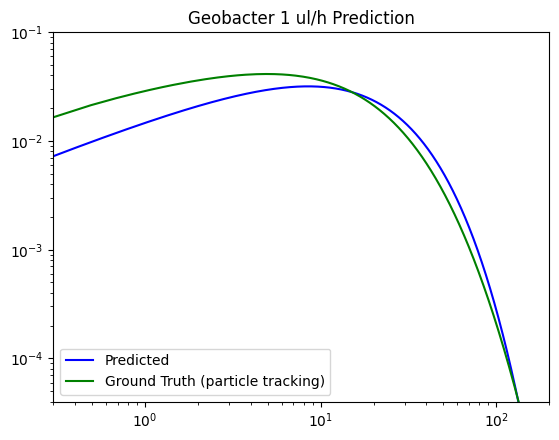

In [26]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Geobacter 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

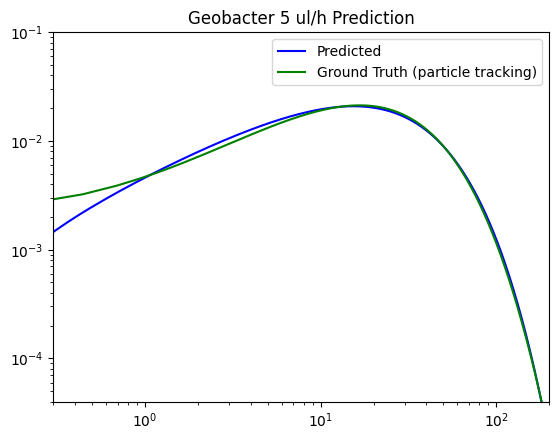

In [52]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Geobacter 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

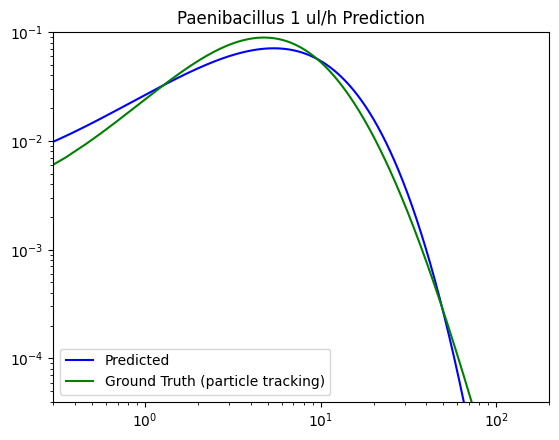

In [126]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Paenibacillus 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

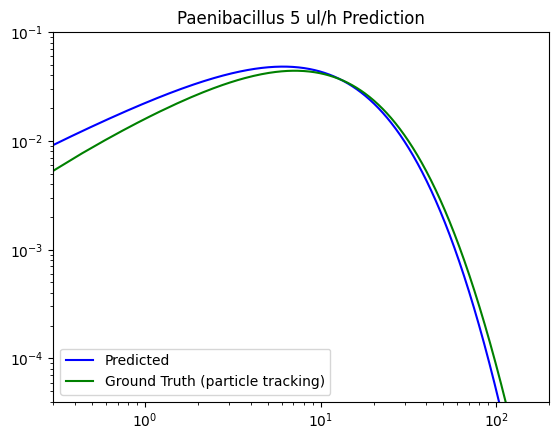

In [42]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Paenibacillus 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

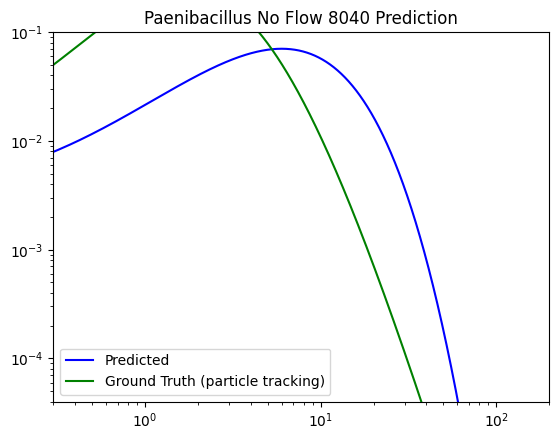

In [49]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Paenibacillus No Flow 8040 Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

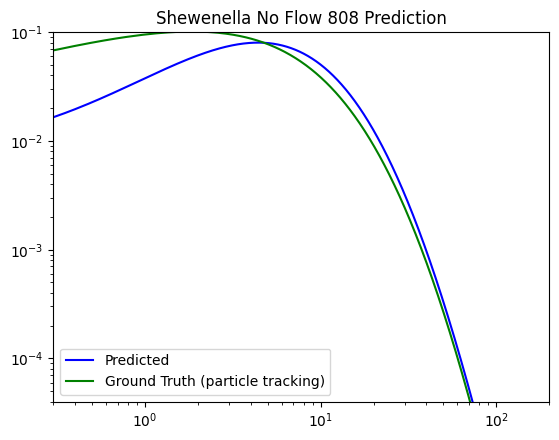

In [31]:
#Shewenella No flow
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Shewenella No Flow 808 Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

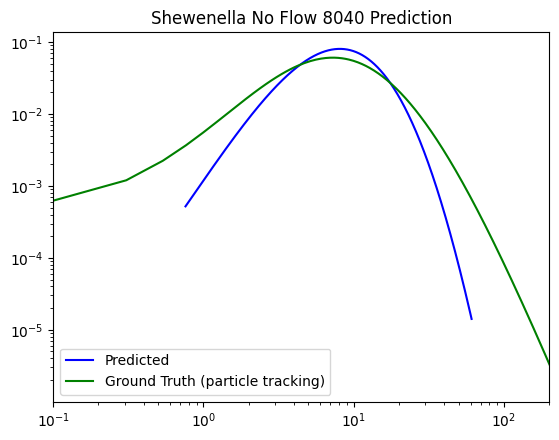

In [112]:
#Shewenella No flow
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,2e2])
#plt.ylim([4e-5,.2])
plt.title('Shewenella No Flow 8040 Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

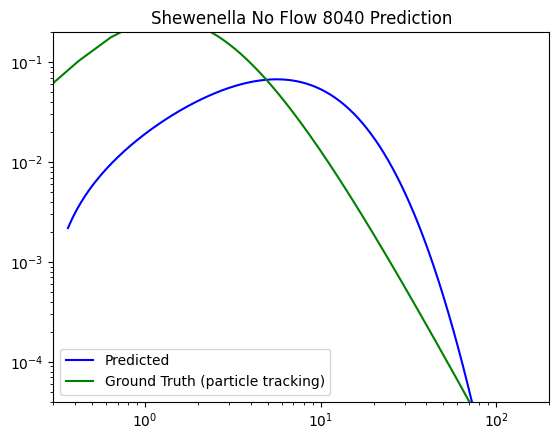

In [45]:
#Shewenella No flow
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.2])
plt.title('Shewenella No Flow 8040 Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

# Angle Model

In [20]:
def calculate_angles_test(x_arr, y_arr):
    traj_stats=[]
    x_diff = np.diff(x_arr)
    y_diff = np.diff(y_arr)
    #print(x_diff.shape)
    angles=np.zeros((len(x_diff),1))
    for i in range(len(x_diff)-1):
        theta_1=np.arctan(y_diff[i]/x_diff[i])
        theta_2=np.arctan(y_diff[i+1]/x_diff[i+1])
        angles[i]=(theta_2-theta_1)*(180/np.pi)
        traj_stats.append([angles])
    
    angles=np.abs(angles[~np.isnan(angles)])
    #angles = interpolate_vectors(np.sort(angles), target_length)
    angles=angles[angles!=0]
    #angles[angles==0]=0.1
    return angles

In [22]:
def process_file(filename):
    df = pd.read_csv(os.path.join(filename), header=0, skiprows=[1, 2, 3])
    tracks = df.TRACK_ID.unique()
    angle_array = []

    for track in tracks:
        posx = df[df.TRACK_ID == track].sort_values(by='FRAME').POSITION_X
        posy = df[df.TRACK_ID == track].sort_values(by='FRAME').POSITION_Y
        angle = calculate_angles_test(np.array(posx),np.array(posy))
        angle_array.extend(angle)
    
    angle_array = np.array(angle_array)
    angle_array = angle_array[(~np.isnan(angle_array)) & (angle_array < 360) & (angle_array > 0)]
    return angle_array

angle_list = Parallel(n_jobs=12)(delayed(process_file)(filename) for filename in full_files)

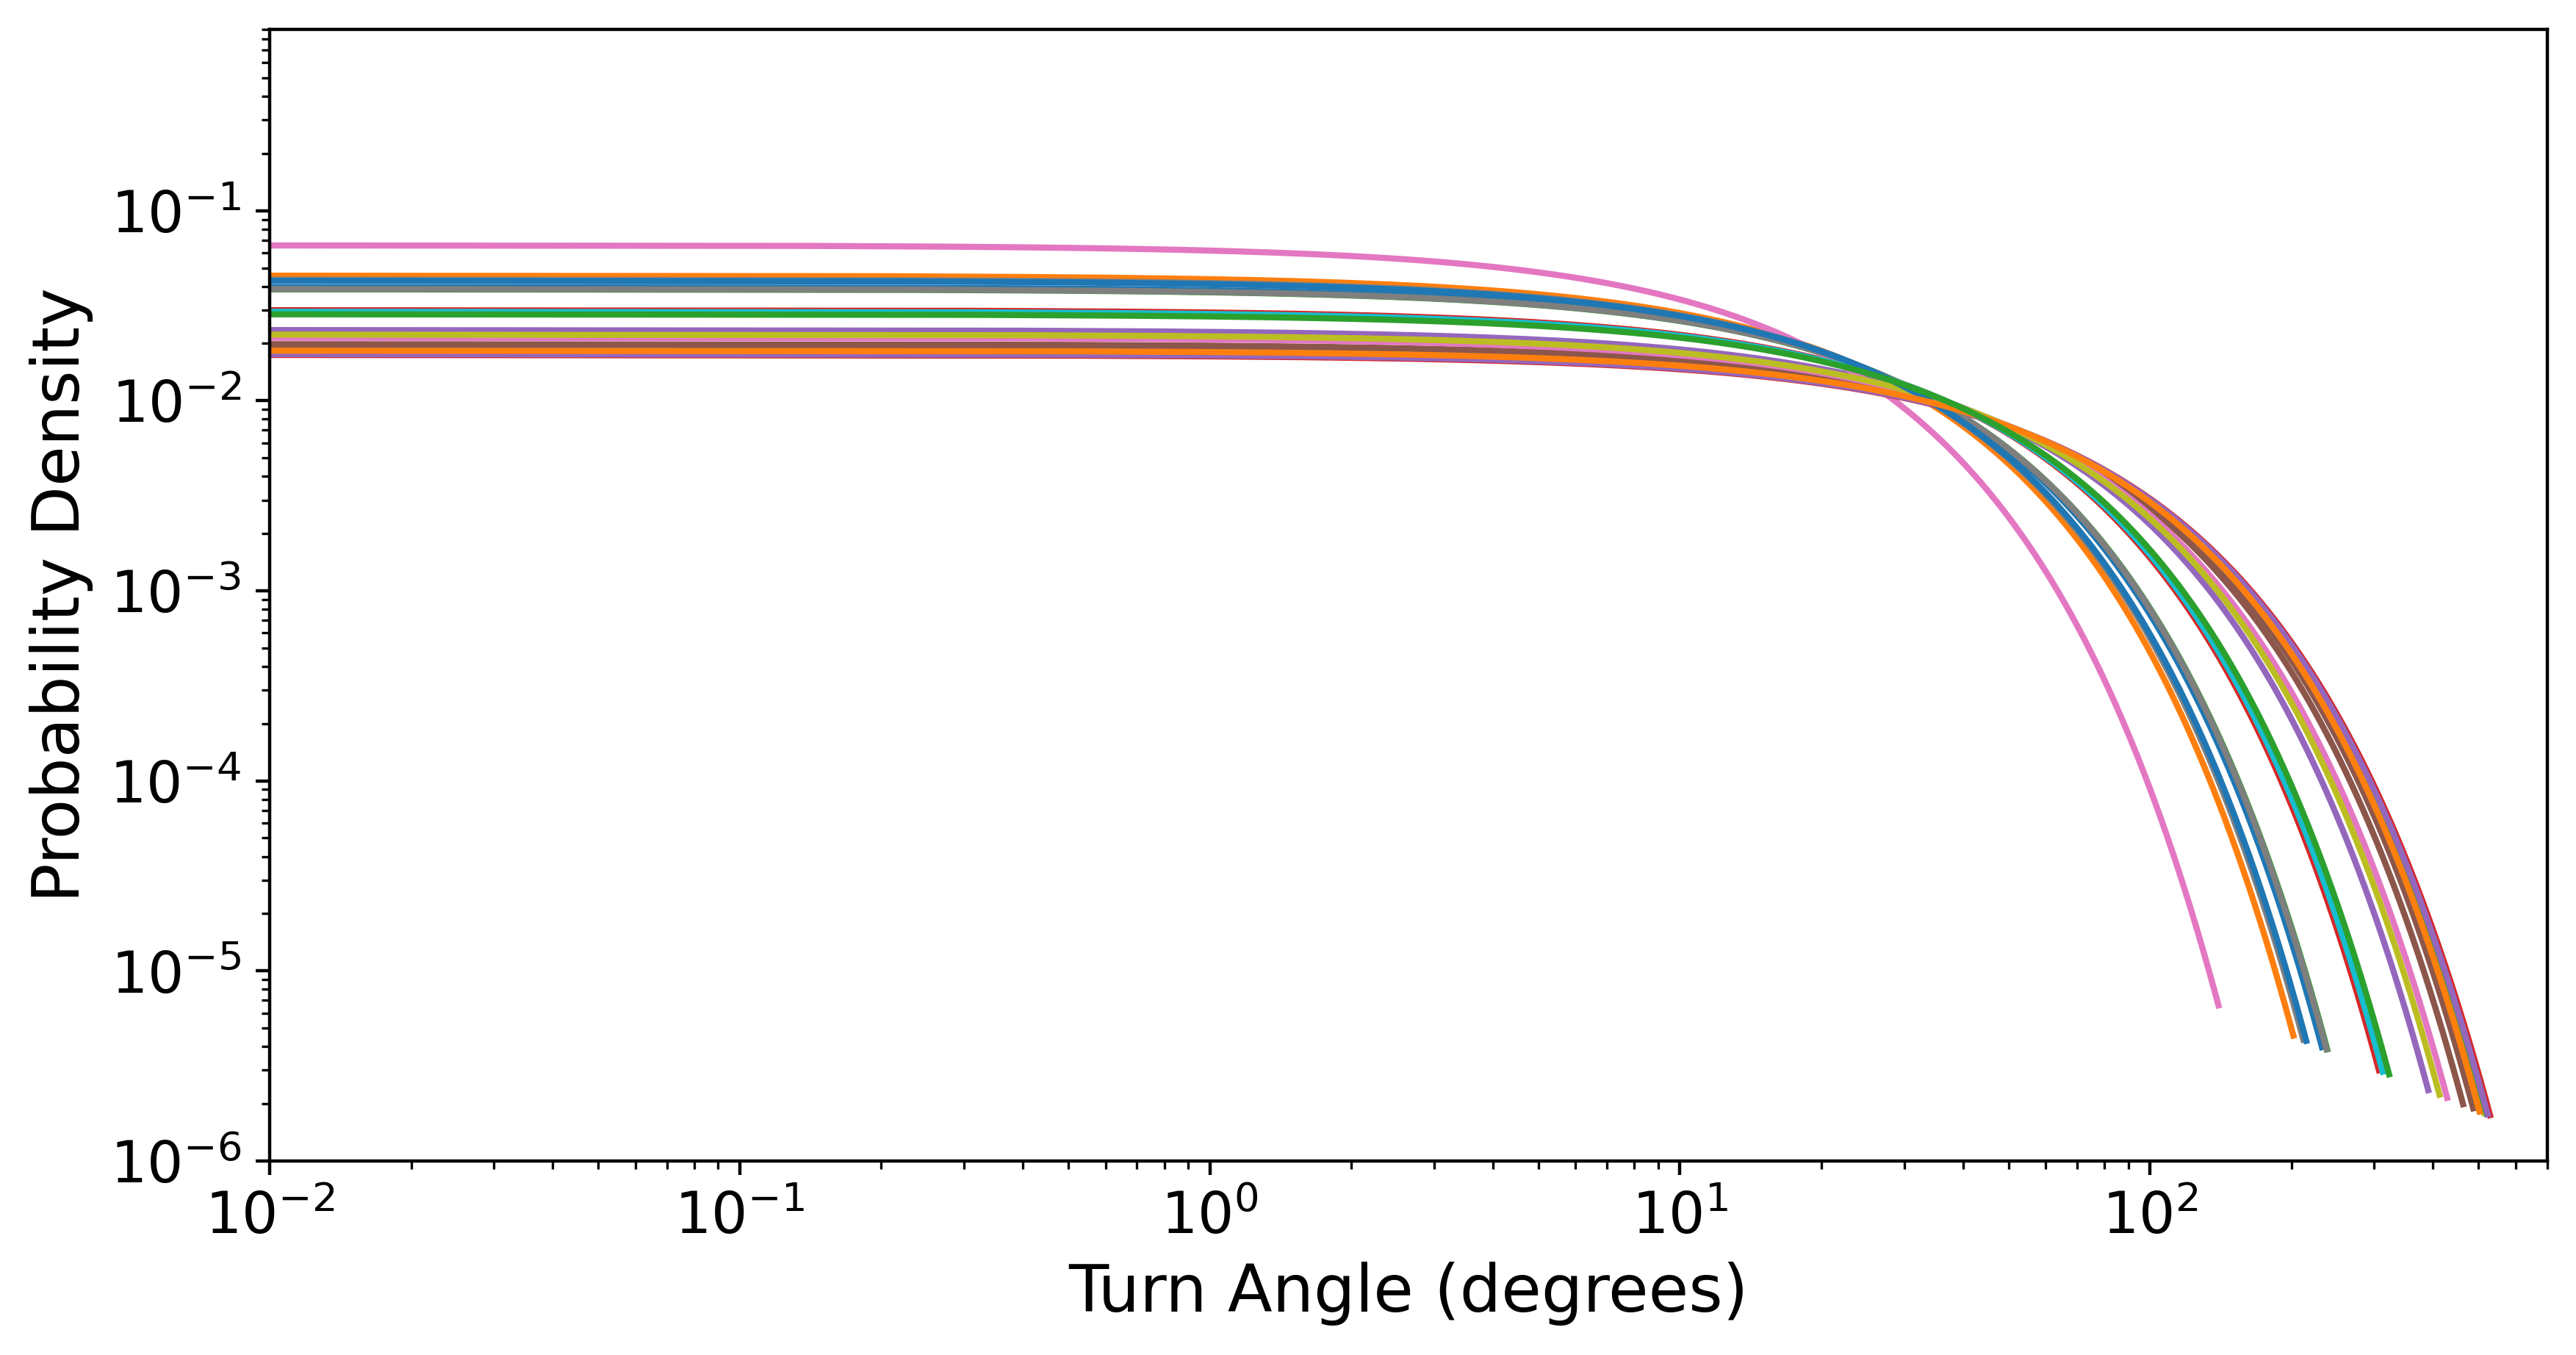

In [24]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm, expon

plt.figure(figsize=(10,5),dpi=400)
for i in range(len(angle_list)):
    w=interpolate_vectors(np.sort(angle_list[i]),1000)
    a,b = expon.fit(w)       
    xtorch= np.linspace(expon.ppf(0.0001, a,b),
                    expon.ppf(0.9999, a,b), 1000)
    distr_torch=expon.pdf(xtorch, a,b)
    plt.plot(xtorch,distr_torch)

plt.ylabel('Probability Density', fontsize=16)
plt.xlabel('Turn Angle (degrees)',fontsize=16)
plt.xlim([1e-2,700])
plt.ylim([1e-6,.9])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.yscale('log')
plt.xscale('log')
#plt.title('Vx Distributions for All Test Simulations', fontsize=12)
plt.savefig('angle_experimental_test_variation.png')
#plt.xscale('log')
#plt.yscale('log')

In [128]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[f_idx]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
angles=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posx = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y

        angle_array = calculate_angles_test(np.array(posx),np.array(posy))
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        #vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        angles = np.hstack([angles, angle_array])

pean_1ulh_001.csv


C:\Users\marcb\AppData\Local\Temp\ipykernel_2308\2801782771.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  theta_2=np.arctan(y_diff[i+1]/x_diff[i+1])
C:\Users\marcb\AppData\Local\Temp\ipykernel_2308\2801782771.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  theta_1=np.arctan(y_diff[i]/x_diff[i])
C:\Users\marcb\AppData\Local\Temp\ipykernel_2308\2801782771.py:9: RuntimeWarning: invalid value encountered in scalar divide
  theta_2=np.arctan(y_diff[i+1]/x_diff[i+1])
C:\Users\marcb\AppData\Local\Temp\ipykernel_2308\2801782771.py:8: RuntimeWarning: invalid value encountered in scalar divide
  theta_1=np.arctan(y_diff[i]/x_diff[i])


In [129]:
angles=np.abs(angles[~np.isnan(angles)])
angles = angles[angles>0]
angles = angles[angles<360]

In [130]:


class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)

model0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=False)
model0.load_state_dict(torch.load('models/turn_angle_model_volod3_448px_disp_all_4_25'))
model0.to(device).eval()

model1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrownv4'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrownv3'))
model2.to(device).eval()

model3 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrownv2'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrown'))
model4.to(device).eval()

model5 = timm.create_model('volo_d3_448', in_chans=30, drop_path_rate=0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/angle_model_volod3_448px_disp_all_5_5'))
model5.to(device).eval()

model6 = timm.create_model('volo_d1_384', in_chans=30, drop_path_rate=0,num_classes=500,pretrained=False)
model6.load_state_dict(torch.load('models/angle_model_volod1_384px_disp_all_5_5'))
model6.to(device).eval()

model7 = timm.create_model('volo_d1_384', in_chans=30, drop_path_rate=0,num_classes=500,pretrained=False)
model7.load_state_dict(torch.load('models/angle_model_volod1_384px_disp_all_5_5_v2'))
model7.to(device).eval()

model8 = timm.create_model('volo_d1_384', in_chans=30, drop_path_rate=0,num_classes=500,pretrained=False)
model8.load_state_dict(torch.load('models/angle_model_volod1_384px_disp_all_5_5_v3'))
model8.to(device).eval()

# model5 = Net()
# model5.load_state_dict(torch.load('models/turn_angle_model'))
# model5.to(device).eval()

VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(30, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [148]:
class_num

4

In [149]:
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model7.eval()
model8.eval()
# model9.eval()
# # model10.eval()
# model11.eval()
import torchvision
outputs=[]

with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)

        out0 =np.sort(model0((x).to(device)).detach().cpu().numpy())
        out1 =np.sort(model1((x2).to(device)).detach().cpu().numpy())*.5
        out2 =np.sort(model2((x2).to(device)).detach().cpu().numpy())*.5
        out3 =np.sort(model3((x2).to(device)).detach().cpu().numpy())*.5
        out4 =np.sort(model4((x2).to(device)).detach().cpu().numpy())*.5


        if class_num==3:
            out=(out0*4+out4*1)/5
        elif class_num==2:
            out=out1
        elif class_num==1:
            out=out0
        elif class_num==4:
            out=(out0*4+out4*1)/5
        #out=out0
        # elif class_num==2:
        #     out=out1
        #out = (out0+out1+out2)/2

        outputs.append(out)

In [166]:
outputs2=[]

with torch.no_grad():
    for x in test_dataloader2:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)

        out5 =np.sort(model5((x).to(device)).detach().cpu().numpy())
        out6 =np.sort(model6((x2).to(device)).detach().cpu().numpy())
        out7 =np.sort(model7((x2).to(device)).detach().cpu().numpy())
        out8 =np.sort(model8((x2).to(device)).detach().cpu().numpy())

        if class_num==4:
            out=(out5*1+out6*5+out7*1+out8*5)/11
        elif class_num==3:
            out=(out5*4+out6*1+out7*4+out8*1)/10
        elif class_num==2:
            out=out1
        elif class_num==1:
            out=out0
        #out=out0
        # elif class_num==2:
        #     out=out1
        #out = (out0+out1+out2)/2

        outputs2.append(out)

In [153]:
np.vstack(outputs2).shape

(80, 500)

In [167]:
newout1 = np.vstack(outputs)
out1 = np.mean(np.abs(newout1),0)
out1=out1[out1>0]

newout2=np.vstack(outputs2)
out2 = np.mean(np.abs(newout2),0)
out2=out2[out2>0]

out1 = interpolate_vectors(out1,len(out2))

if class_num==4:
    out = (out1*3+out2*1)/4
elif class_num==3:
    out = (out1*1+out2*5)/6
elif class_num==2:
    out=out1
elif class_num==1:
    out=out2
out.shape


(500,)

In [155]:
newout1.shape

(56, 500)

In [168]:
print(np.mean(out), np.mean(angles))

33.755956870364024 33.887445340014125


In [71]:

class_num

3

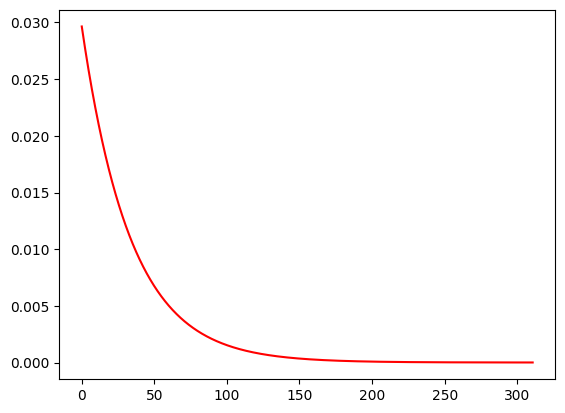

In [169]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm, expon
new_out=(out5*4+out6*1+out7*4+out8*1)/10
a,b= expon.fit(np.sort(out))
g5xtorch= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_torch=expon.pdf(g5xtorch, a,b)
plt.plot(g5xtorch,g5distr_torch,c='r')

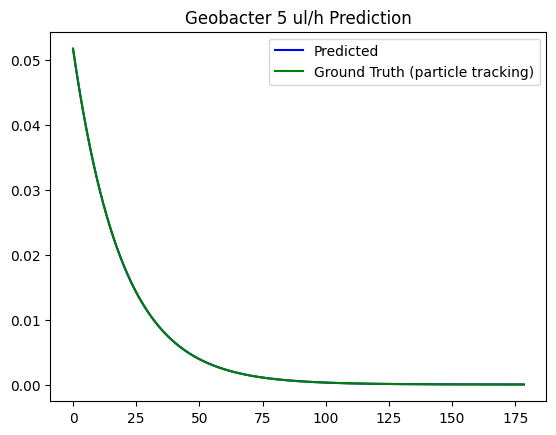

In [89]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

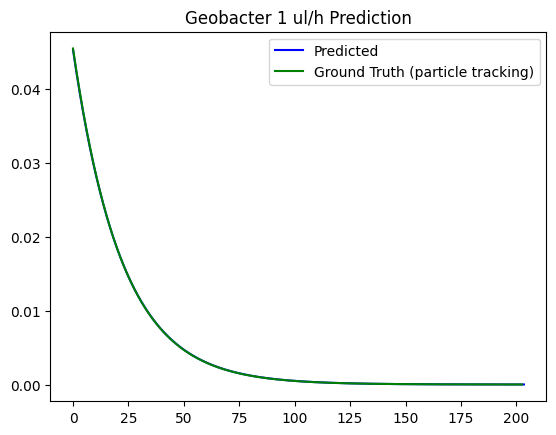

In [83]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

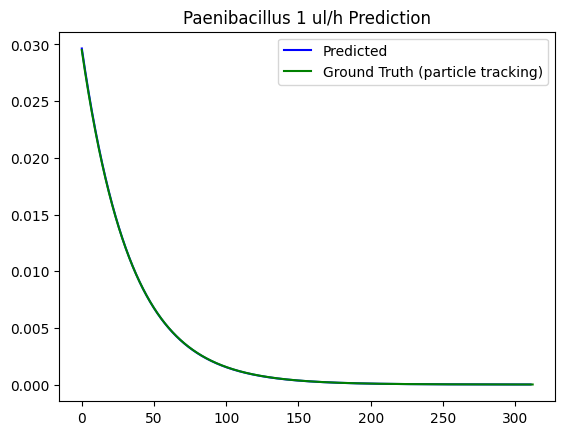

In [170]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

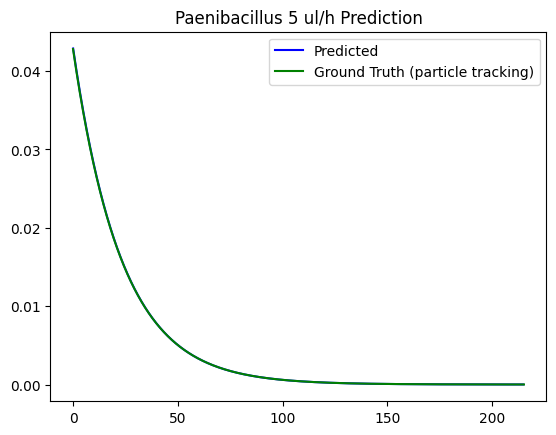

In [102]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

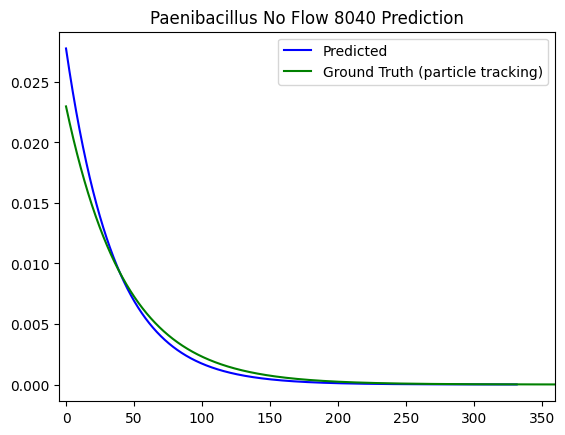

In [61]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')
plt.xlim([-5,360])
plt.title('Paenibacillus No Flow 8040 Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

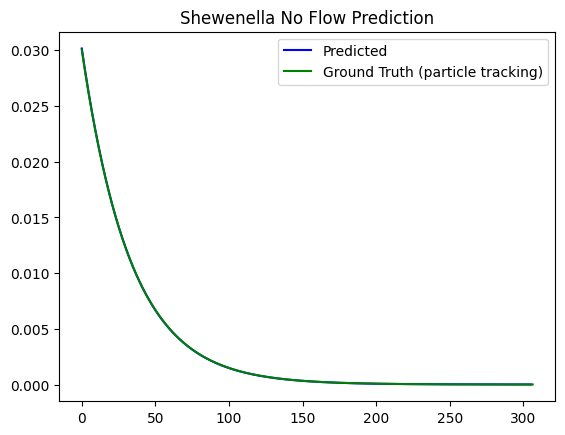

In [41]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Shewenella No Flow Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

In [59]:
np.max(angles)

180.0

(-5.0, 360.0)

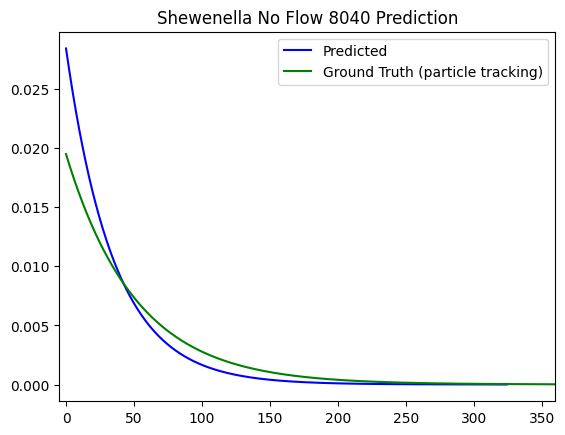

In [61]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Shewenella No Flow 8040 Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])
plt.xlim([-5,360])

# Velocity Model

## Vx

In [171]:
from torch import nn
import torch.nn.functional as F

class Patch_model2(nn.Module):
    def __init__(self):
        super(Patch_model2, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model3(nn.Module):
    def __init__(self):
        super(Patch_model3, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model4(nn.Module):
    def __init__(self):
        super(Patch_model4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc0=nn.Linear(2000, 500)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        #x = F.gelu(self.fc1(x))
        x = self.fc0(x)
        return x#,x2,x3,x4


class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(4000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = torch.cat([x,x0],dim=1)#x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)
        return x#,x2,x3,x4

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=1000,pretrained=True)

    def forward(self, x):
        x = self.m1(x)
        return x#,x2,x3,x4

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4
    

In [172]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'
# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=Net2()
# model.to(device)
# Define your custom dataset

class TestDataset2(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]

        return image.float()

In [173]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 
        self.m2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 

        self.fc1=nn.Linear(2,2)
        # self.fc2 = nn.Linear(2000,1000)

    def forward(self, x):
        vx = F.gelu(self.m1(x))
        vy = F.gelu(self.m2(x))
        vx = vx.unsqueeze(2)
        vy = vy.unsqueeze(2)
        x = torch.cat([vx,vy],dim=2)
        
        # x = F.gelu(self.fc1(x))
        x = self.fc1(x)
       # x = self.fc3(x)


        return x#,x2,x3,x4

In [174]:
model0 = timm.create_model('volo_d4_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model0.load_state_dict(torch.load('models/vx_model_volod4_448px_disp_all_max151_1078_min-49_9241'))
model0.to(device).eval()

model1 = timm.create_model('volo_d2_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/vx_model_volod1_384px_noscale_disp_500_4_27'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/vx_model_volod1_384px_opposite_disp_300_4_27'))
model2.to(device).eval()

model3 = timm.create_model('regnetx_032', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/vx_model_regnetx32_384px_disp_all_4_27'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/vx_model_volod1_384px_disp_all_4_27'))
model4.to(device).eval()

model5 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/vx_model_volod3_448px_disp_all_4_27'))
model5.to(device).eval()

model6 = timm.create_model('regnetx_016', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model6.load_state_dict(torch.load('models/vx_model_regnetx_384px_disp_all_4_27'))
model6.to(device).eval()

model7 = Net4()
model7.load_state_dict(torch.load('models/vel_model_volod1_384px_disp_all_4_27'))
model7.to(device).eval()

model8 = timm.create_model('volo_d3_448', in_chans=30, drop_path_rate=.0,num_classes=500,pretrained=False)
model8.load_state_dict(torch.load('models/vx_model_volod3_448px_disp_all_max219_541_min-49_9241'))
model8.to(device).eval()

VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(30, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [26]:
def calculate_velocity( y_positions):
    # Calculate velocities
    y_velocities = (y_positions[1:] - y_positions[:-1]) 
    
    # Initialize an array to store the velocity autocorrelation values
    
    return  y_velocities

In [181]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model7.eval()
model8.eval()

# print (slope200, slope300, slope500, slope_all)
# print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)
slope200, int200 = 182.7808, -16.0141
slope_all, int_all = 216.6908, -49.9241
slope_all2, int_all2 = 230, -45
#vx_model_volod4_448px_disp_all_max151_1078_min-49_9241
max1 = 151.1078
min1 = -49.9241
slope1 = max1-min1
int1 = min1

max2 = 219.541
min2 = -49.9241
slope2 = max2-min2
int2 = min2

with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        out0 = np.sort(model0((x1).to(device)).detach().cpu().numpy())*slope1+int1
       # x=1-x
        x2 = torchvision.transforms.functional.resize(x, 384)
        
        out1 = np.sort(model1((x2).to(device)).detach().cpu().numpy())
        out2 = np.sort(model2((1-x2).to(device)).detach().cpu().numpy())*slope200+int200
        out4 = np.sort(model4((x2).to(device)).detach().cpu().numpy())*slope_all+int_all
        out5 = np.sort(model5((x1).to(device)).detach().cpu().numpy())*slope_all2+int_all2
        out6 = np.sort(model6((x).to(device)).detach().cpu().numpy())
        out7= np.sort(model7((x2).to(device)).detach().cpu().numpy())*slope_all2+int_all2
        out8 = out7[:,:,0]*1.5-10
        out9 = out7[:,:,0]*1.3-16
        out7 = out7[:,:,0]

        
        ##class1
        if class_num==2:
            out=(out0*10+out1+out4*4+out5+out2*3+out7+out8*2)/22

        elif class_num==3:
            out=(out0*5+out1*8+out2*10+out4*6+out8*3+out9*5)/37

        elif class_num==4:
            out=(out0*10+out1*18+out9*3)/34

        outputs.append(out)
        #outputs2.append(out2)

In [182]:
newout = np.vstack(outputs)
outputs = np.mean(newout,0)
np.mean(outputs)

1.9549272

In [183]:
max2 = 219.541
min2 = -49.9241
slope2 = max2-min2
int2 = min2

outputs2=[]
with torch.no_grad():
    for x in test_dataloader2:
        out8 = np.sort(model8((x).to(device)).detach().cpu().numpy())*slope2+int2

        outputs2.append(out8)

In [184]:
newout = np.vstack(outputs2)
outputs2 = np.mean(newout,0)
np.mean(outputs2)


2.046991

In [218]:
if class_num==4:
    out3 = (outputs)
elif class_num==3:
    out3 = (outputs*16+ outputs2)/17
elif class_num==2:
    out3 = (outputs*16+ outputs2)/17
elif class_num==1:
    out3 = (outputs*16+ outputs2)/17
out3.shape


(500,)

In [30]:
def process_file(filename):
    df = pd.read_csv(os.path.join(filename), header=0, skiprows=[1, 2, 3])
    tracks = df.TRACK_ID.unique()
    angle_array = []

    for track in tracks:
        posx = df[df.TRACK_ID == track].sort_values(by='FRAME').POSITION_Y
        #posy = df[df.TRACK_ID == track].sort_values(by='FRAME').POSITION_Y
        angle = calculate_velocity(np.array(posx))
        angle_array.extend(angle)
    
    angle_array = np.array(angle_array)
    angle_array = angle_array[(~np.isnan(angle_array)) & (np.abs(angle_array) < 300) ]
    return angle_array

vy_list = Parallel(n_jobs=12)(delayed(process_file)(filename) for filename in full_files)

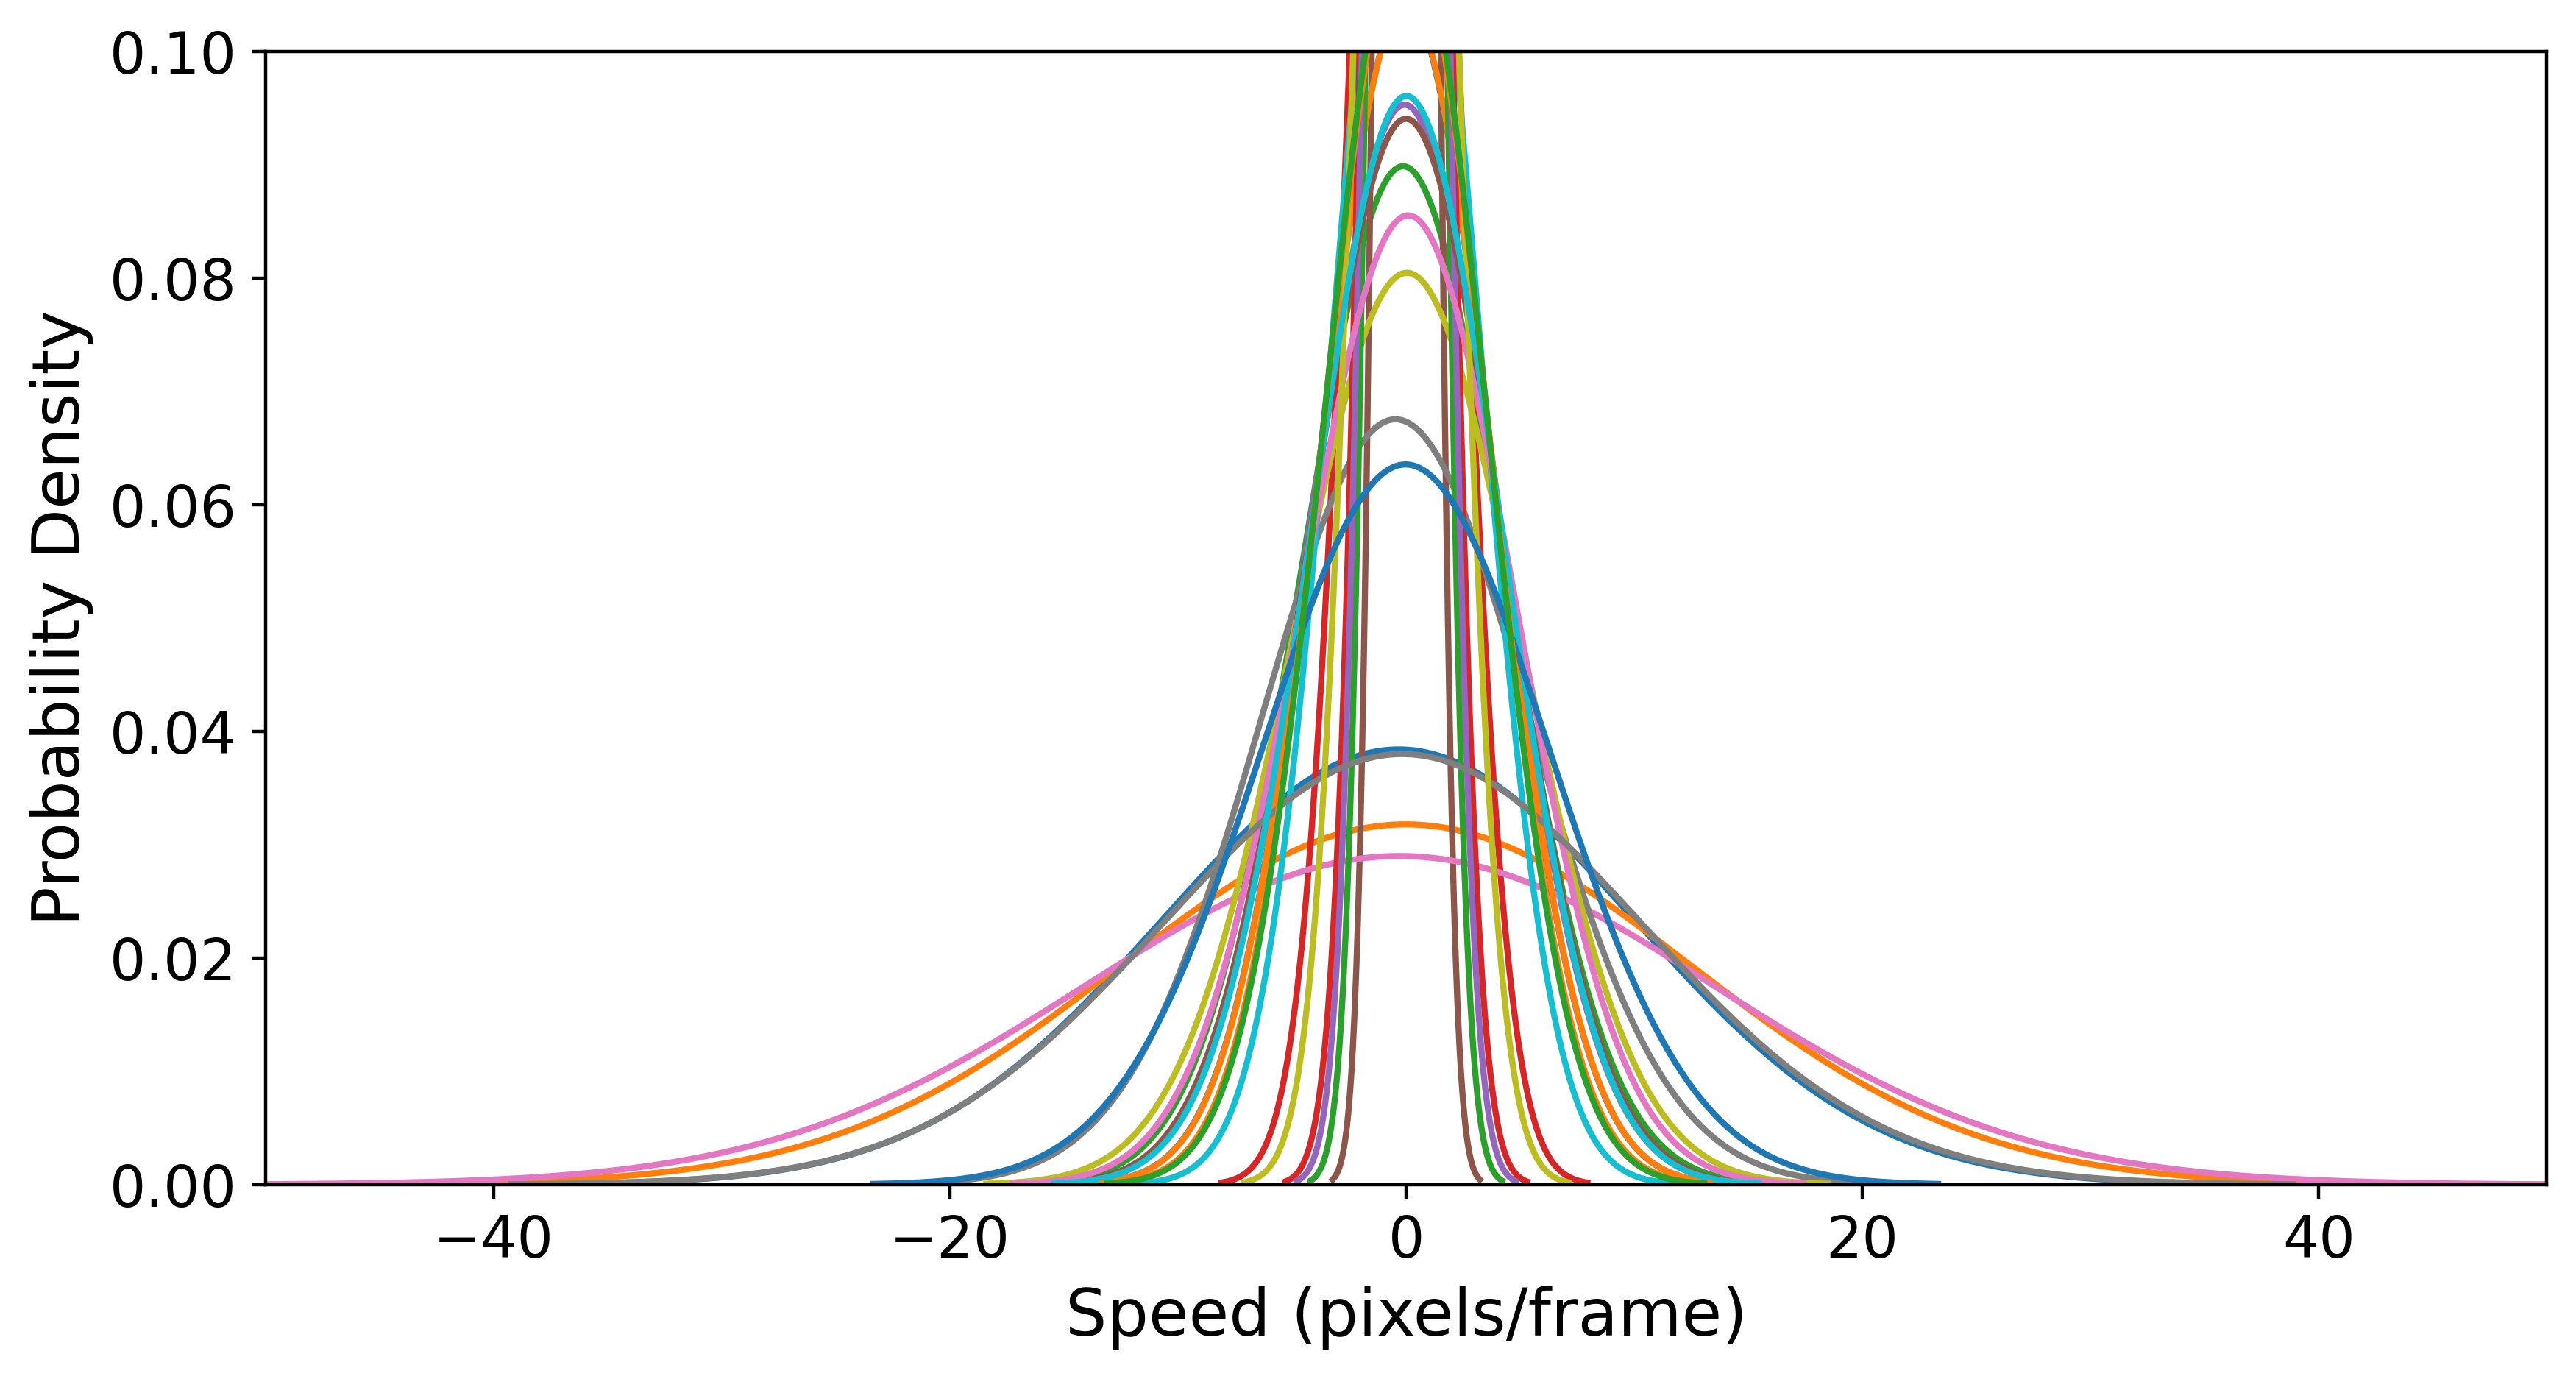

In [31]:
plt.figure(figsize=(10,5),dpi=400)
for i in range(len(vy_list)):
    w=interpolate_vectors(np.sort(vy_list[i]),1000)
    a,b = norm.fit(w)       
    xtorch= np.linspace(norm.ppf(0.0001, a,b),
                    norm.ppf(0.9999, a,b), 1000)
    distr_torch=norm.pdf(xtorch, a,b)
    plt.plot(xtorch,distr_torch)

plt.ylabel('Probability Density', fontsize=16)
plt.xlabel('Speed (pixels/frame)',fontsize=16)
plt.xlim([-50,50])
plt.ylim([0,.1])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
# plt.yscale('log')
# plt.xscale('log')
#plt.title('Vx Distributions for All Test Simulations', fontsize=12)
plt.savefig('vy_experimental_test_variation.png')
#plt.xscale('log')
#plt.yscale('log')

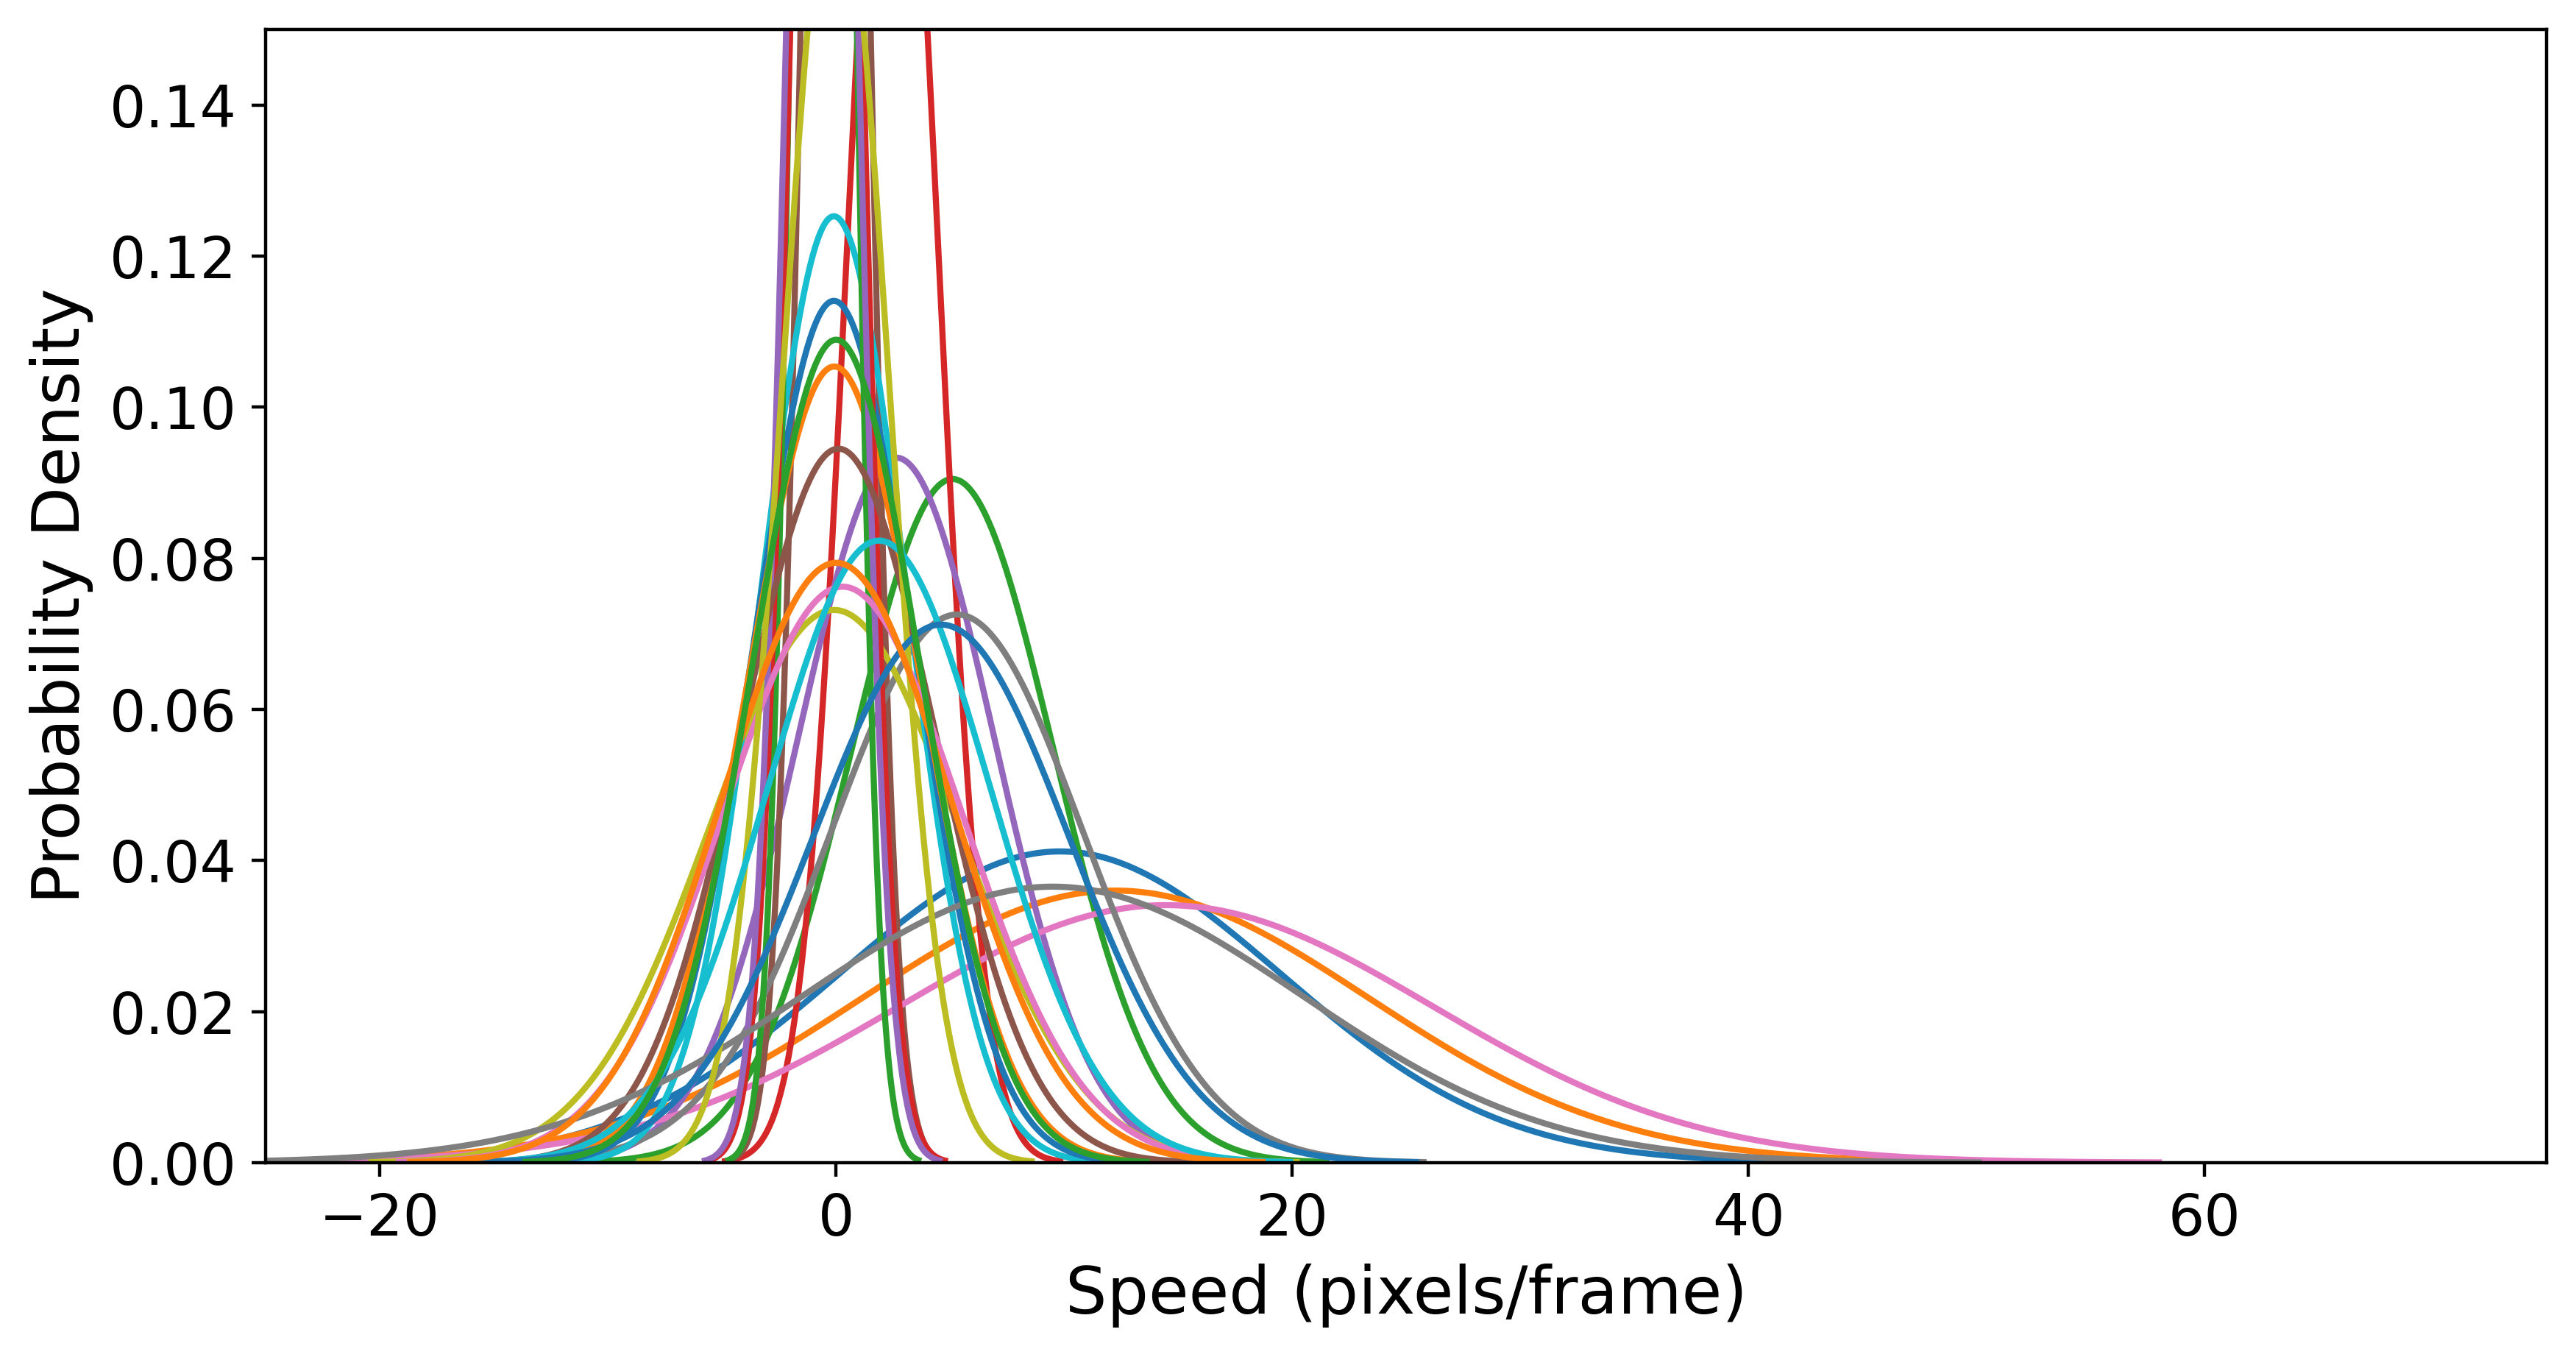

In [29]:
plt.figure(figsize=(10,5),dpi=400)
for i in range(len(vx_list)):
    w=interpolate_vectors(np.sort(vx_list[i]),1000)
    a,b = norm.fit(w)       
    xtorch= np.linspace(norm.ppf(0.0001, a,b),
                    norm.ppf(0.9999, a,b), 1000)
    distr_torch=norm.pdf(xtorch, a,b)
    plt.plot(xtorch,distr_torch)

plt.ylabel('Probability Density', fontsize=16)
plt.xlabel('Speed (pixels/frame)',fontsize=16)
plt.xlim([-25,75])
plt.ylim([0,.15])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
# plt.yscale('log')
# plt.xscale('log')
#plt.title('Vx Distributions for All Test Simulations', fontsize=12)
plt.savefig('vx_experimental_test_variation.png')
#plt.xscale('log')
#plt.yscale('log')

In [186]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[f_idx]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        yvel = calculate_velocity(np.array(posy))
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        #vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        vels = np.hstack([vels, yvel])

pean_1ulh_001.csv


In [188]:
vels=vels[~np.isnan(vels)]


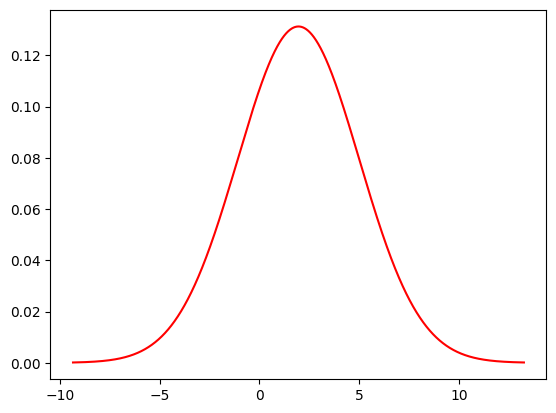

In [219]:
a,b= norm.fit(np.sort(out3))
g5xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
g5distr_torch=norm.pdf(g5xtorch, a,b)
plt.plot(g5xtorch,g5distr_torch,c='r')

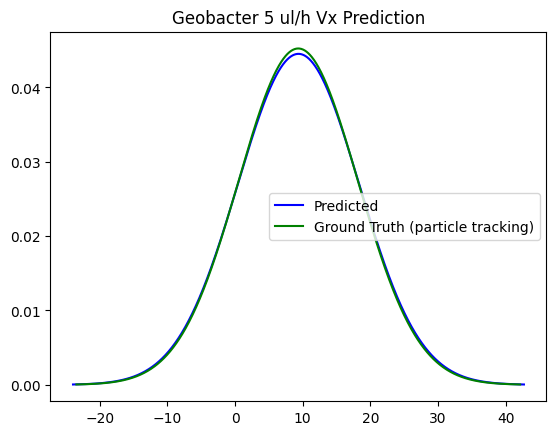

In [126]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

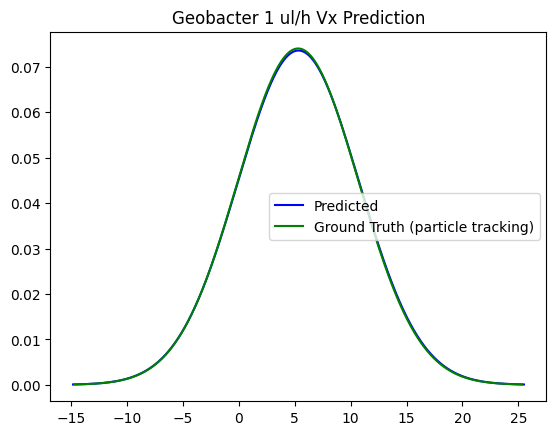

In [147]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

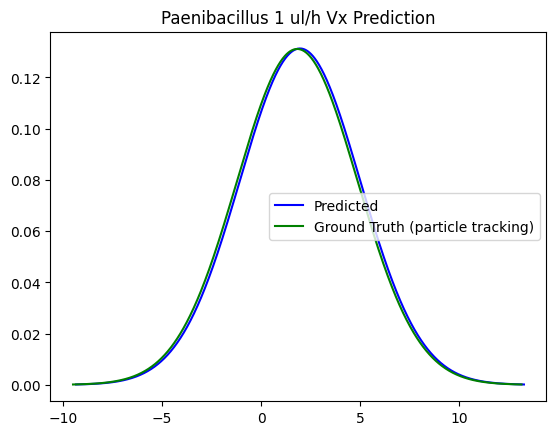

In [220]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

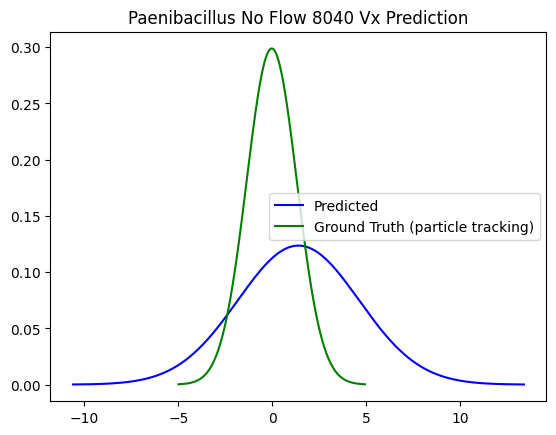

In [72]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus No Flow 8040 Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

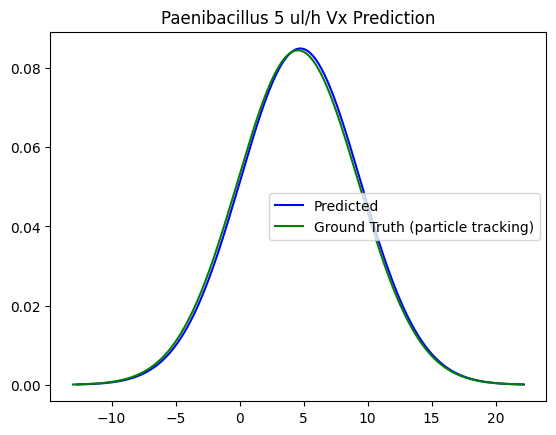

In [164]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

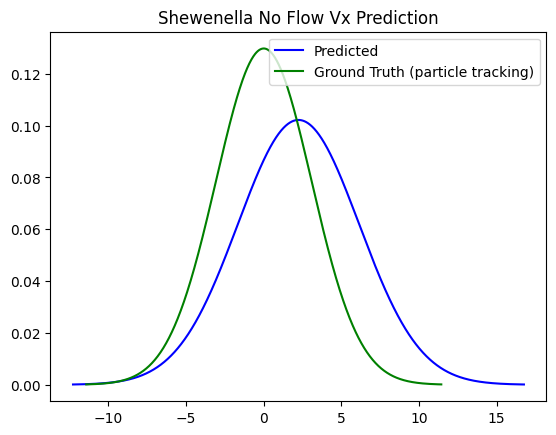

In [52]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Shewenella No Flow Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

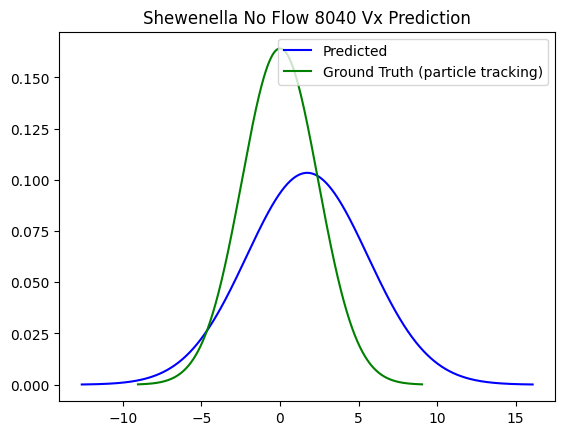

In [74]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Shewenella No Flow 8040 Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

In [73]:
filenames

['acid_1ulh_001.csv',
 'acid_1ulh_002.csv',
 'acid_1ulh_003.csv',
 'acid_open_20x_20fps_001.csv',
 'geo_1ulh_001.csv',
 'geo_5ulh_001.csv',
 'paen_8040_20x_20fps_006.csv',
 'pean_1ulh_001.csv',
 'pean_5ulh_001.csv',
 'shew_8040_20x_002.csv',
 'shew_808_20x_20fps_005.csv',
 'sim157_brown.csv',
 'sim690.csv',
 'test1.csv',
 'test16.csv',
 'test17.csv',
 'test2.csv',
 'test5.csv',
 'test8.csv']

## Vy

In [221]:
model0 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model0.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_max69_2162_min-66_9786_v3'))
model0.to(device).eval()

model1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_max69_2162_min-66_9786_v2'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_max69_2162_min-66_9786'))
model2.to(device).eval()

model3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/vy_model_volod1_224px_disp_all_max69_2162_min-66_9786'))
model3.to(device).eval()

model4 = timm.create_model('volo_d4_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/vy_model_volod4_448px_disp_all_max64_4513_min-66_1406'))
model4.to(device).eval()

model5 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_4_27'))
model5.to(device).eval()

model6 = timm.create_model('volo_d3_448', in_chans=30, drop_path_rate=.0,num_classes=500,pretrained=False)
model6.load_state_dict(torch.load('models/vy_model_volod3_448px_disp_all_max132_73_min-95_1744'))
model6.to(device).eval()

VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(30, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [222]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()


# print (slope200, slope300, slope500, slope_all)
# print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)
max1 = 69.2162
min1 = -66.9786
slope1 = max1-min1
int1 = min1

max2 = 64.4513
min2 = -66.1406
slope2 = max2-min2
int2 = min2

with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)
        x3 = torchvision.transforms.functional.resize(x, 224)
        out0 = np.sort(model0((x2).to(device)).detach().cpu().numpy())*slope1+int1
        out1 = np.sort(model1((x2).to(device)).detach().cpu().numpy())*slope1+int1
        out2 = np.sort(model2((x2).to(device)).detach().cpu().numpy())*slope1+int1
        out3 = np.sort(model3((x3).to(device)).detach().cpu().numpy())*slope1+int1
        out4 = np.sort(model4((x1).to(device)).detach().cpu().numpy())*slope2+int2
        out4_1 = out4*1.75+2.5
        out4_2 = out4*1.55-3.5
        out4_3 = out4*.75
        out5 = np.sort(model5((x2).to(device)).detach().cpu().numpy())*slope2+int2
        out5_2 = np.sort(model5((x2).to(device)).detach().cpu().numpy())*slope1+int1

        
        ##class1
        if class_num==2:
            out=(out0+out1+out2+out3+out4*30+out5+out5_2+out4_2*22)/58

        if class_num==3:
            out=(out0+out1+out2+out3+out4*30+out5+out5_2+out4_2*24+out4_1*6)/64

        if class_num==4:
            out=(out4*25+out4_2*1+out4_3*6)/32

                ##class3
        #out=(out0*18+out1*4+out4*1+out2*2)/31

        outputs.append(out)
        #outputs2.append(out2)

In [223]:
max2 =132.73
min2 = -95.1744
slope2 = max2-min2
int2 = min2
outputs2=[]
with torch.no_grad():
    for x in test_dataloader2:

        out6 = np.sort(model6((x).to(device)).detach().cpu().numpy())*slope2+int2


        outputs2.append(out6)

In [224]:
np.vstack(outputs2).shape

(80, 500)

In [225]:
newout = np.vstack(outputs)
outputs = np.mean(newout,0)

newout = np.vstack(outputs2)
outputs2 = np.mean(newout,0)
class_num



4

In [233]:
out3=outputs
#out3 = (outputs2*.8+interpolate_vectors(outputs, len(outputs2)))/1.8

In [227]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[f_idx]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
        yvel = calculate_velocity(np.array(posy))
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        #vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        vels = np.hstack([vels, yvel])
vels=vels[~np.isnan(vels)]

pean_1ulh_001.csv


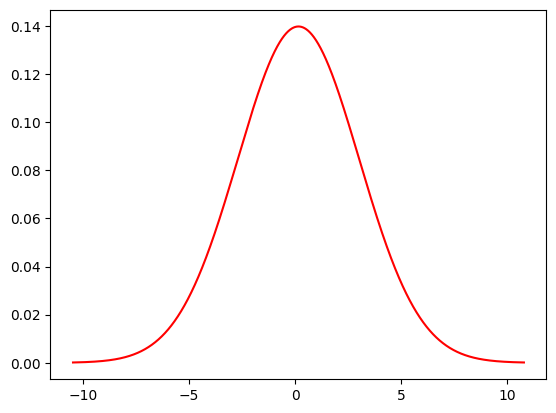

In [234]:
a,b= norm.fit(np.sort(out3))
g5xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
g5distr_torch=norm.pdf(g5xtorch, a,b)
plt.plot(g5xtorch,g5distr_torch,c='r')

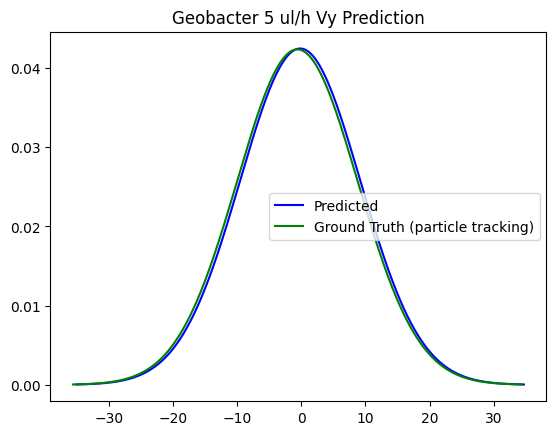

In [161]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

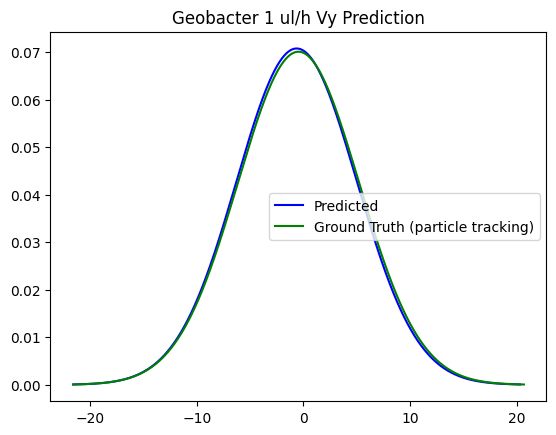

In [180]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

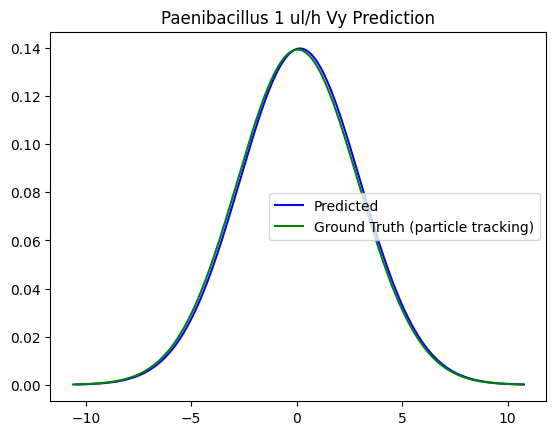

In [235]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

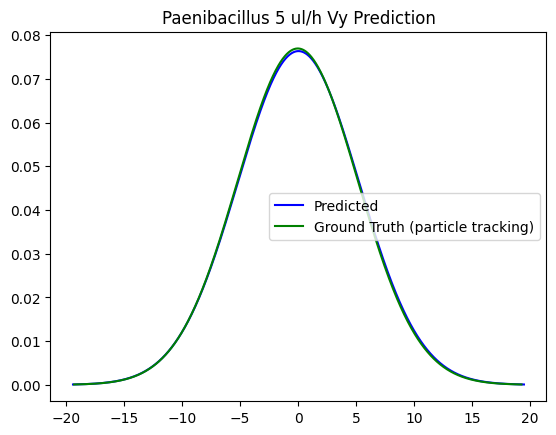

In [206]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

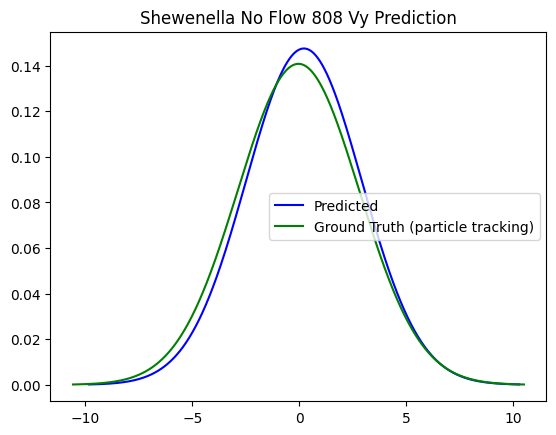

In [59]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Shewenella No Flow 808 Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

# MSD

In [60]:
base='all_traj_files/'
target_length=500
def calculate_msd(x_positions, y_positions):
    num_frames = len(x_positions)
    # Initialize an array to store the MSD values
    msd = np.zeros(num_frames)
    # Calculate the displacement for each particle at each frame
    for frame in range(num_frames):
        x_displacements = x_arr[frame] - x_arr[0]
        y_displacements = x_arr[frame] - x_arr[0]
        
        # Calculate the squared displacement for each particle
        squared_displacements = x_displacements**2 + y_displacements**2
        
        # Calculate the MSD for the current frame
        msd[frame] = np.nanmean(squared_displacements)
    
    return msd



In [61]:
model0 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model0.load_state_dict(torch.load('models/MSD_model_volod1_224px_disp_all_4_27'))
model0.to(device).eval()

model1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/MSD_model_volod1_384px_disp_all_max_1363419_2'))
model1.to(device).eval()


model2 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/MSD_model_volod3_448px_disp_all_4_27'))
model2.to(device).eval()

model3 = timm.create_model('volo_d4_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/MSD_model_volod4_448px_disp_all'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/MSD_model_volod1_384px_disp_200_v2'))
model4.to(device).eval()

model5 = timm.create_model('volo_d5_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/MSD_model_volod5_448px_disp_500'))
model5.to(device).eval()

model6 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model6.load_state_dict(torch.load('models/MSD_model_volod1_384px_disp_200'))
model6.to(device).eval()


VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [62]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[f_idx]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
msds=np.zeros([len(tracks),500])
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
        posx = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        if np.all(posx==0):
            continue
        if np.all(posx==2047.0):
            continue
        else:
            x_arr= np.array(posx)
            y_arr= np.array(posy)
            msd_array = calculate_msd(x_arr,y_arr)
            #msd_array = np.sort(msd_array)
            msd_array=(msd_array[~np.isnan(msd_array)])
            msd_array = msd_array[msd_array>0]
            msd_array = interpolate_vectors(np.sort(msd_array), target_length)
            msds[i,:] = msd_array


shew_808_20x_20fps_005.csv


In [185]:
np.all(posx==2047.0)

True

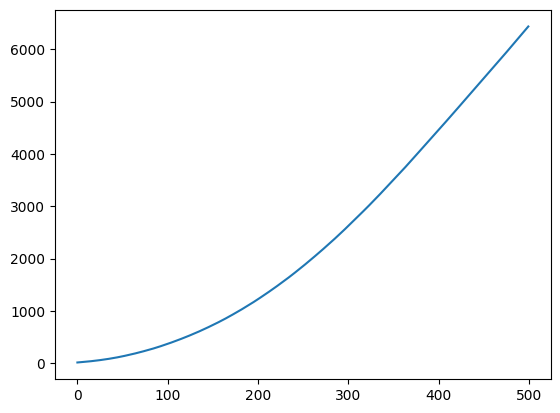

In [63]:
msds.shape
mean_msd = np.mean(msds,0)
plt.plot(mean_msd)

In [64]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()



# print (slope200, slope300, slope500, slope_all)
# print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)
max1 = 1360000


with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)
        x3 = torchvision.transforms.functional.resize(x, 224)
        out0 = (np.sort(model0((x3).to(device)).detach().cpu().numpy())*max1+6000)*1.6
        out1 = np.sort(model1((x2).to(device)).detach().cpu().numpy())*max1+2000
        out2 = np.sort(model2((x1).to(device)).detach().cpu().numpy())*max1
        out3 = (np.sort(model3((x1).to(device)).detach().cpu().numpy())*max1+3000)*.9
        out4 = (np.sort(model4((1-x2).to(device)).detach().cpu().numpy())*max1+2000)*.8
        out5 = (np.sort(model5((1-x1).to(device)).detach().cpu().numpy())*max1+10000)*.3
        out6 = np.sort(model6((1-x2).to(device)).detach().cpu().numpy())*max1+4000


        
        ##class1
        if class_num==1:
            out=(out1*10+out0+out3*2)/13
            out[:,0:250] = (out[:,0:250]+.5*out0[:,0:250])/1.5
            out[:,0:320] = (out[:,0:320]+.25*out3[:,0:320])/1.25

        if class_num==2:
            out=(out0*11+out6*3+out3*2+out1+out2*3)/20
            out[:,0:150] = (out[:,0:150]+1*out0[:,0:150])/2
            out[:,0:250] = (out[:,0:250]+.5*out2[:,0:250])/1.5
            out[:,300:] = (out[:,300:]+.5*out6[:,300:])/1.5
            out[:,400:498] = (out[:,400:498]+.5*out6[:,400:498])/1.5

        ##class3
        if class_num==3:
            out=(out6*17+out3*2+out5*5+out2*3)/27
            out[:,0:150] = (out[:,0:150]+1*out2[:,0:150])/2
            out[:,0:250] = (out[:,0:250]+.5*out5[:,0:250])/1.5
            out[:,95:280] = (out[:,95:280]+.2*out4[:,95:280])/1.2
            out[:,150:380] = (out[:,150:380]+.25*out4[:,150:380])/1.25
            out[:,300:] = (out[:,300:]+.5*out6[:,300:])/1.5
            out[:,400:498] = (out[:,400:498]+.75*out6[:,400:498])/1.75

        ##class4
        #out=(out0*10+out1*14+out9*2)/27

        outputs.append(out)
        #outputs2.append(out2)

In [65]:
mean_out = np.mean(np.vstack(outputs),0)
mean_out[mean_out<0]=20
# mx = np.linspace(1,23,23)
# y = 76*mx+400
# mean_out[1:24] = y
# mean_out[0]=400

In [66]:
mean_out

array([2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 9.48114699e+01,
       2.03676579e+02, 3.04880222e+02, 4.10819808e+02, 5.24754437e+02,
       6.86943289e+02, 8.09831440e+02, 8.82696833e+02, 1.06110350e+03,
       1.23309345e+03, 1.38719747e+03, 1.48883149e+03, 1.58209421e+03,
       1.66829669e+03, 1.74100003e+03, 1.81296889e+03, 1.87650904e+03,
       1.93713884e+03, 2.01733742e+03, 2.17793334e+03, 2.27616056e+03,
      

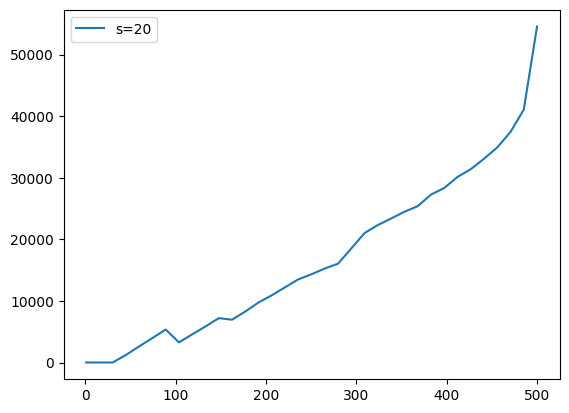

In [67]:
from scipy.interpolate import splrep, BSpline
x = np.linspace(1, 500, 500)
tck = splrep(x, mean_out, s=2000)
xnew = np.linspace(1, 500, 35)
ynew= BSpline(*tck)(xnew)
plt.plot(xnew, ynew, '-', label='s=20')
#plt.plot(x, mean_out, 'o')
plt.legend()
plt.show()


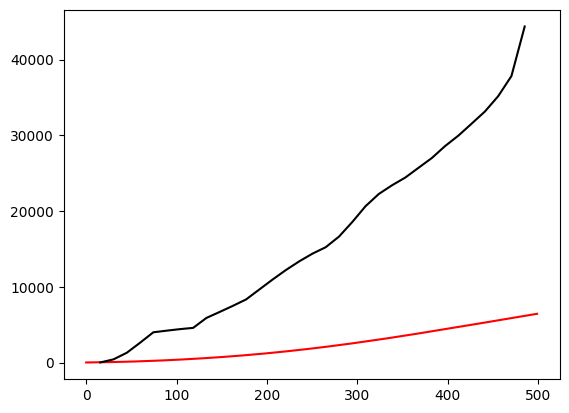

In [68]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
mean_out2 = moving_average(ynew,3)
plt.plot(mean_msd,c='r')
# plt.plot(smoothed_vector,c='g')
plt.plot(xnew[1:-1],mean_out2,c='k')

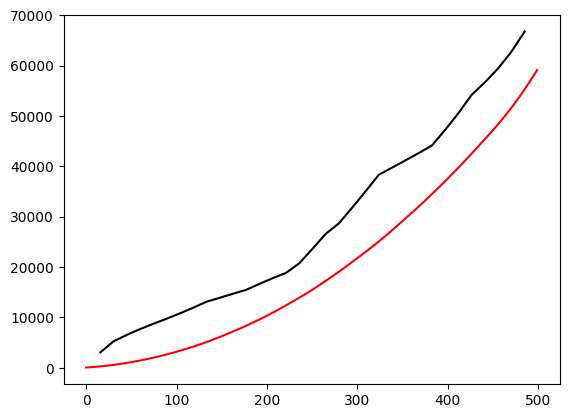

In [81]:
#plt.plot(np.mean(out6,0),c='b')

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
mean_out2 = moving_average(ynew,3)
plt.plot(mean_msd,c='r')
# plt.plot(smoothed_vector,c='g')
plt.plot(xnew[1:-1],mean_out2,c='k')
# plt.xscale('log')
# plt.yscale('log')

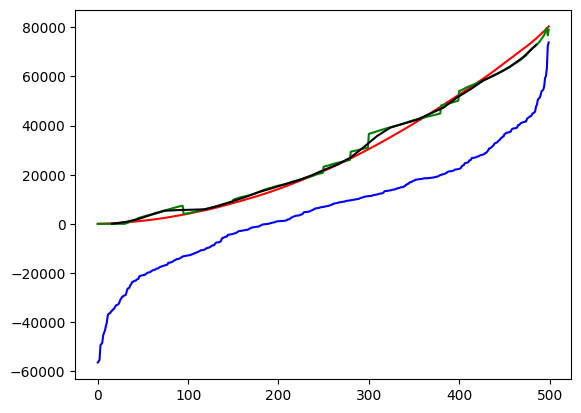

In [269]:
plt.plot(np.mean(out4,0),c='b')
plt.plot(mean_msd,c='r')
plt.plot(mean_out,c='g')
plt.plot(xnew[1:-1],mean_out2,c='k')
# plt.xscale('log')
# plt.yscale('log')

In [135]:
(mean_out[20])-(mean_out[0])/(19)

1520.1924860168558

In [132]:
np.mean(np.vstack(outputs),0)

array([-5.82775822e+03, -3.51028942e+03, -2.66289396e+03, -2.00232872e+03,
       -1.53835326e+03, -1.18687843e+03, -8.59373126e+02, -5.90408427e+02,
       -3.69520216e+02, -1.24821418e+02,  6.58182387e+01,  2.43547056e+02,
        4.04251694e+02,  5.76737054e+02,  7.18200278e+02,  8.56175780e+02,
        9.92279292e+02,  1.14145696e+03,  1.28694963e+03,  1.42685481e+03,
        1.54821488e+03,  1.65428590e+03,  1.77051460e+03,  1.89429167e+03,
        2.01173083e+03,  2.12934688e+03,  2.23925543e+03,  2.35256551e+03,
        2.48024007e+03,  2.59821736e+03,  2.72113813e+03,  2.83678684e+03,
        2.95169535e+03,  3.06149882e+03,  3.18033710e+03,  3.31354111e+03,
        3.46110835e+03,  3.57546793e+03,  3.73099413e+03,  3.84771416e+03,
        3.95828905e+03,  4.08057260e+03,  4.18984210e+03,  4.31714265e+03,
        4.42709421e+03,  4.54837449e+03,  4.66058321e+03,  4.77263838e+03,
        4.87383597e+03,  4.97945113e+03,  5.09649194e+03,  5.21678872e+03,
        5.34855714e+03,  

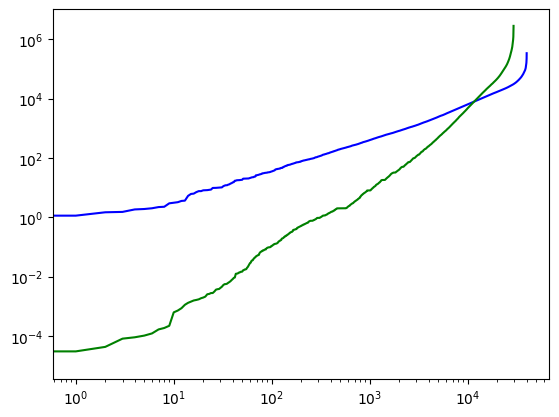

In [226]:
outputs2 = interpolate_vectors(outputs, len(msds))
plt.plot(np.sort(outputs), c='b')
plt.plot(np.sort(msds), c='g')
plt.xscale('log')
plt.yscale('log')

In [227]:
len(msds)

29386

In [201]:
outputs

array([-17439.092, -13038.38 , -12494.351, ..., 346081.03 , 346607.56 ,
       346771.62 ], dtype=float32)